# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/UT AI/My Projects/Project 2: Personal Loan Campaign/Loan_Modelling.csv")

## Data Overview

###Displaying the first and the last five rows of the dataset

In [ ]:
# to view first 5 rows of the dataset
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# to view last 5 rows of the dataset
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking the shape of the dataset

In [ ]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [ ]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

### Let's check the duplicate data. And if any, we should remove it.

In [ ]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no duplicated values in the dataset.

### Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* Dependent variable is the Personal_Loan, which if of *int* type.
* `CCAvg` is of *float* type.
* All other variables are of *int* type.
* There are no missing values in any of the columns.

### Checking the statistical summary

In [ ]:
# Let's look at the statistical summary of the data
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* We can see that the mean of Personal_Loan is 0.096 which means that 9.6% of customers have loans at the bank.

* The average income of the customers is \$73,770.
50% of the customers are making at least \$64,000.
The minimum income is \$8,000.

* We notice that some numbers in the Experience column are negative and assume that this happened because of data input errors. This issue will be addressed below in the Data Preprocessing section.


## Data Preprocessing

### Checking for Anomalous Values

We notice (see Checking the statistical summary above) that some numbers in the Experience column are negative and assume that
this happened because of data input errors. We drop the negative signs everywhere.

In [ ]:
# We now drop the negative signs everywhere
ar=data[data['Experience'] < 0]['Experience'].unique()
for x in ar:
  data['Experience'].replace(x, abs(x), inplace=True)

In [ ]:
#We check
data['Experience'].describe().T

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Since min is 0, there are no negative values any more.

In [ ]:
# For convenience, let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

In [ ]:
# Let's look at the statistical summary of the data again
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.134600    11.415189      0.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

## Exploratory Data Analysis

### Univariate Analysis

####Important plot functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

####Age

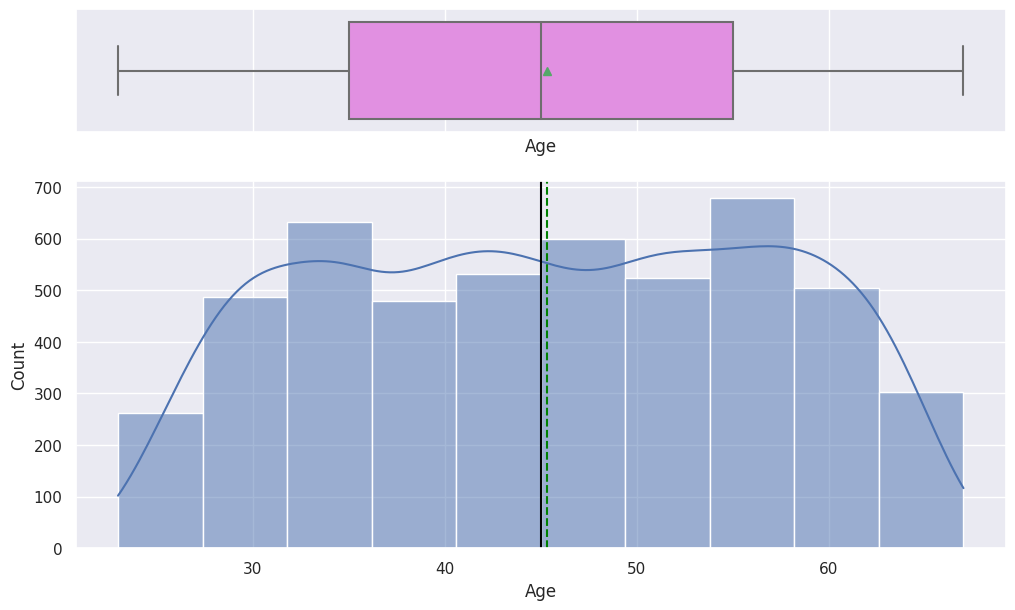

In [ ]:
histogram_boxplot(data, 'Age', bins=10, kde=True);

**CONCLUSION**: The histogram for Age is not skewed.

Min age of customers is 23yo.

25% of customers is 35yo or younger.

50% of customers is 45yo or younger.

75% of customers is 55yo or younger.

Max age of customers is 67yo.


####Experience

<ipython-input-22-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


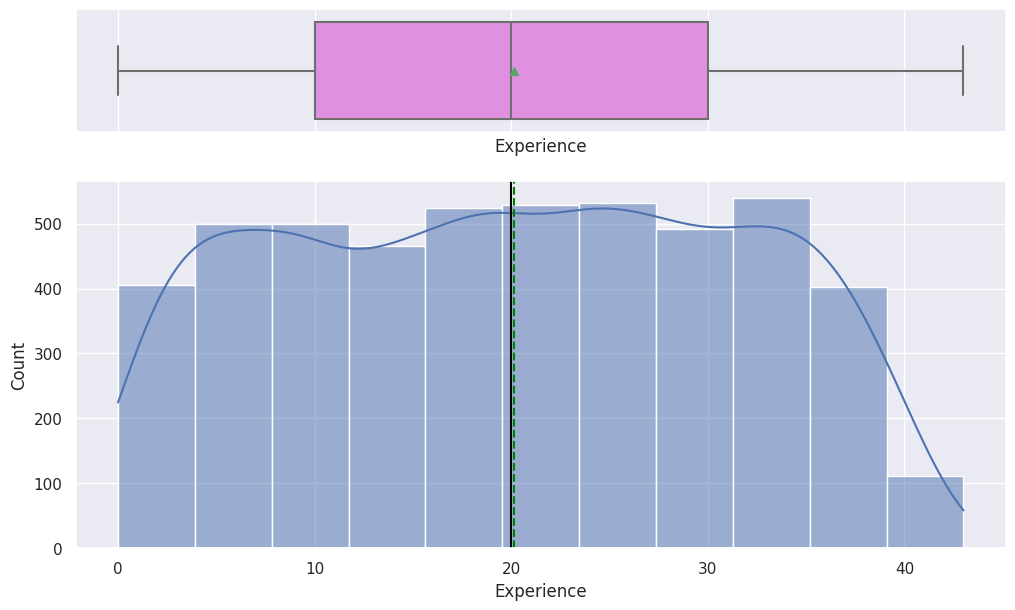

In [ ]:
histogram_boxplot(data, 'Experience', bins=11, kde=True)

**CONCLUSION**: The histogram for Experience is not skewed.

Min experience of customers is 0y.

25% of customers have 10y of experience or lesser.

50% of customers have 20y of experience or lesser.

75% of customers have 30y of experience or lesser.

Max experience of customers is 43y.

####Income

<ipython-input-22-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


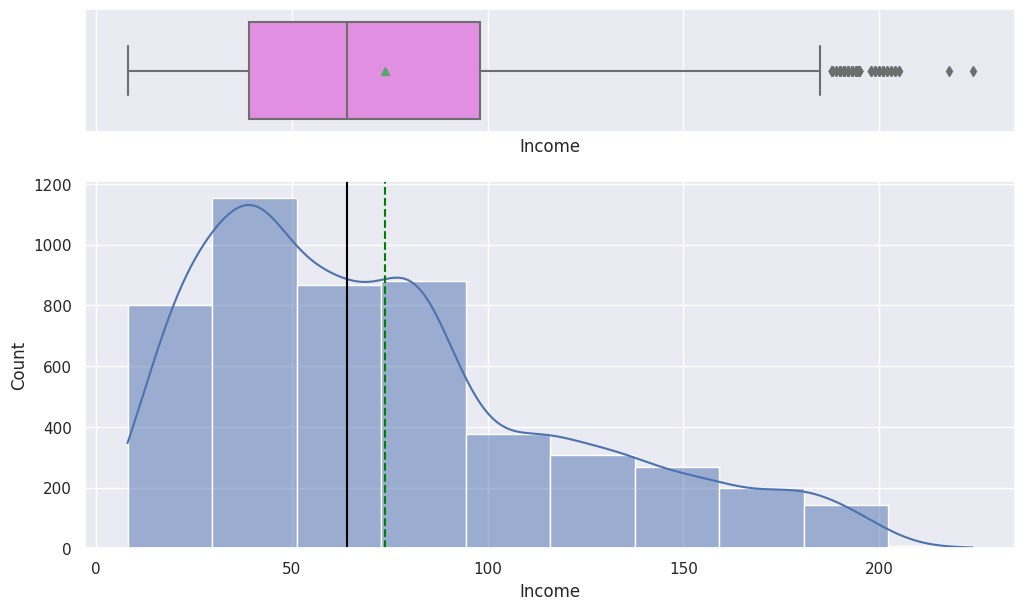

In [ ]:
histogram_boxplot(data, 'Income', bins=10, kde=True)

**CONCLUSION**: The histogram for Income is skewed to the right.

Min income of customers is $8,000.

Income of 25% of customers is at most $39,000.

Income of 50% of customers is at most $64,000.

Income of 75% of customers is at most $98,000.

Max income of customers is $224,000.

####ZIPCode

<ipython-input-22-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


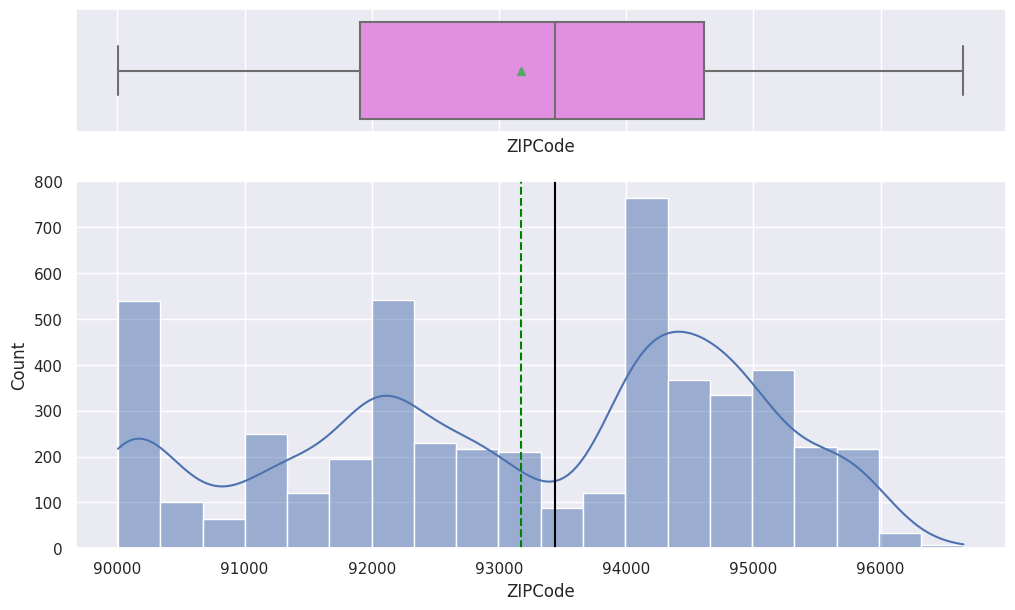

In [ ]:
histogram_boxplot(data, 'ZIPCode', bins=20, kde=True)

**CONCLUSION**: The histogram for ZIPCode is very uneven. For example, there are many customers with zip codes between 94000 and 94500. At the same time, there are much fewer customers with zip codes between 90300 and 91000.

####Family

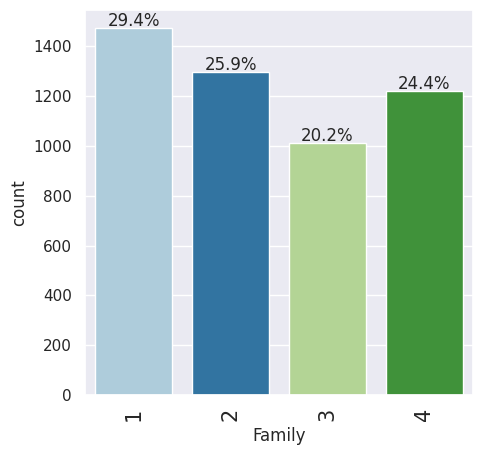

In [ ]:
labeled_barplot(data, 'Family', perc=True)

**CONCLUSION**: Almost a third of customers are singles.

####CCAvg

<ipython-input-22-f3b56adba9bd>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


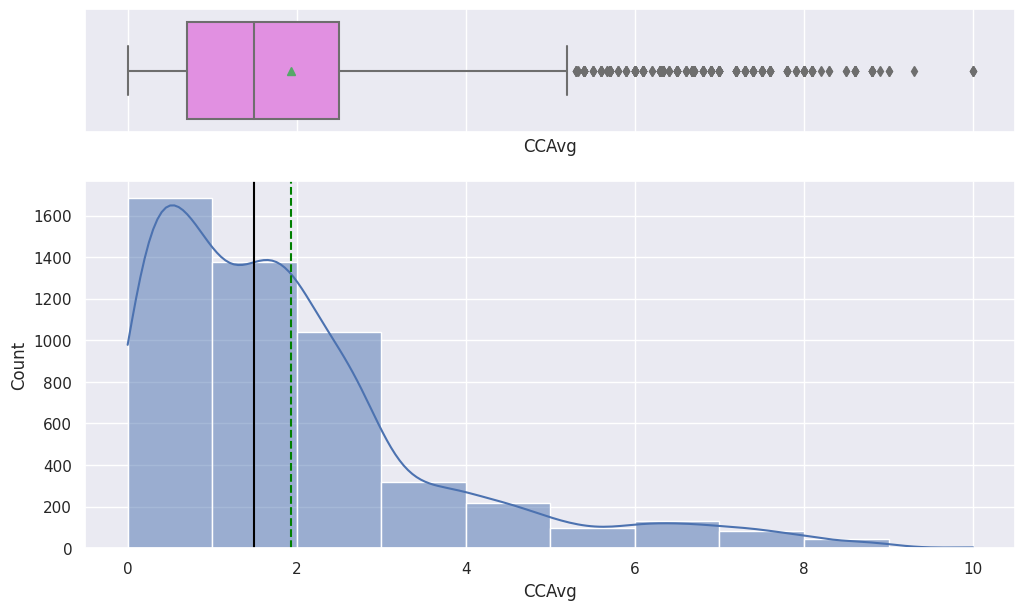

In [ ]:
histogram_boxplot(data, 'CCAvg', bins=10, kde=True)

**CONCLUSION**: The histogram for Income is skewed to the right.

Min spending on credit cards per month is $0.0.

25% of customers spend at most $700 per month.

50% of customers spend at most $1,500 per month.

75% of customers spend at most $2,500 per month.

Max spending on credit cards per month is $10,000. Apparently, this is the largest credit line in the bank.


####Education

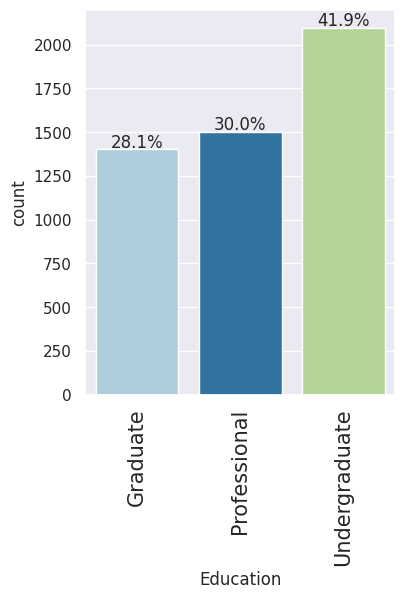

In [ ]:
labeled_barplot(data, 'Education', perc=True)

**CONCLUSION**: More than 40% of customers have an undergraduate degree.

####Mortgage

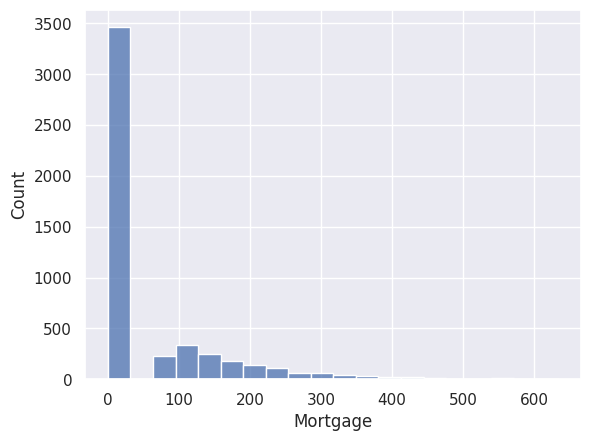

In [ ]:
sns.histplot(data=data, x='Mortgage', bins=20);

**CONCLUSION**: Most customers don't have any mortgage.

In order to  analyze the data better, let us exclude these customers for a moment.

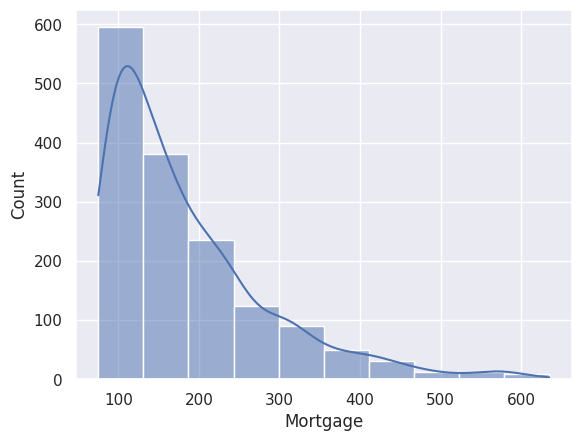

In [ ]:
dtt=data[data['Mortgage']>0]
sns.histplot(data=dtt, x='Mortgage', bins=10, kde=True);

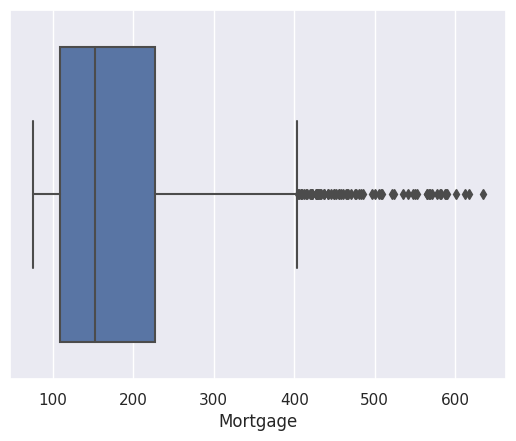

In [ ]:
sns.boxplot(data=dtt, x='Mortgage');

In [ ]:
dtt['Mortgage'].describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

Whiskers:

227+(227-109)*1.5=404

109-(227-109)*1.5=-68 -->  75 (we replace by min)

**CONCLUSION**: The histogram for customers that have a mortgage
is skewed to the right. And there are many outliers.

Min mortgage is $75,000.

Mortgage of 25% of customers is at most $109,000.

Mortgage of 50% of customers is at most $153,000.

Mortgage of 75% of customers is at most $227,000.

Max mortgage is $635,000.


####Personal Loan

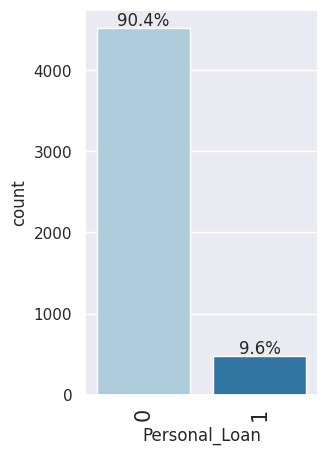

In [ ]:
labeled_barplot(data, 'Personal_Loan', perc=True)

**CONCLUSION**: More than 90% of customers do not have personal loans.

####Securities Account

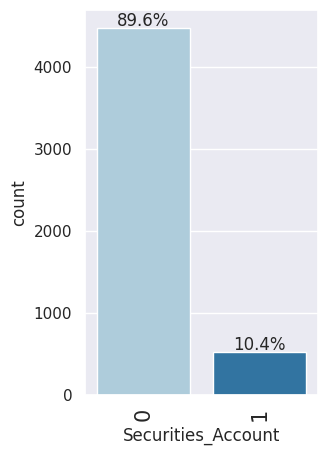

In [ ]:
labeled_barplot(data, 'Securities_Account', perc=True)

**CONCLUSION**: Almost 90% of customers do not have securities accounts.

####CD Account

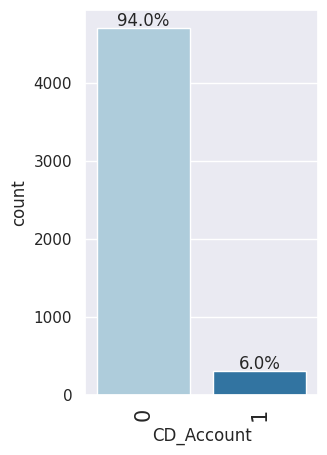

In [ ]:
labeled_barplot(data, 'CD_Account', perc=True)

**CONCLUSION**: 94% of customers do not have CD accounts.

####Online Banking

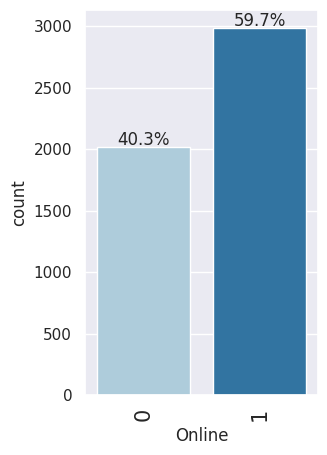

In [ ]:
labeled_barplot(data, 'Online', perc=True)

**CONCLUSION**: More than 40% of customers do not use internet banking facilities.

####Credit Card

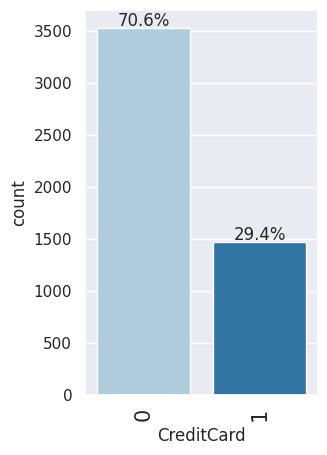

In [ ]:
labeled_barplot(data, 'CreditCard', perc=True)

#####How many customers have credit cards?

In [ ]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**CONCLUSION**: 1470 customers (which is about 30%) have credit cards issued by banks other than  All life Bank.

### Bivariate Analysis

####Important plot functions

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

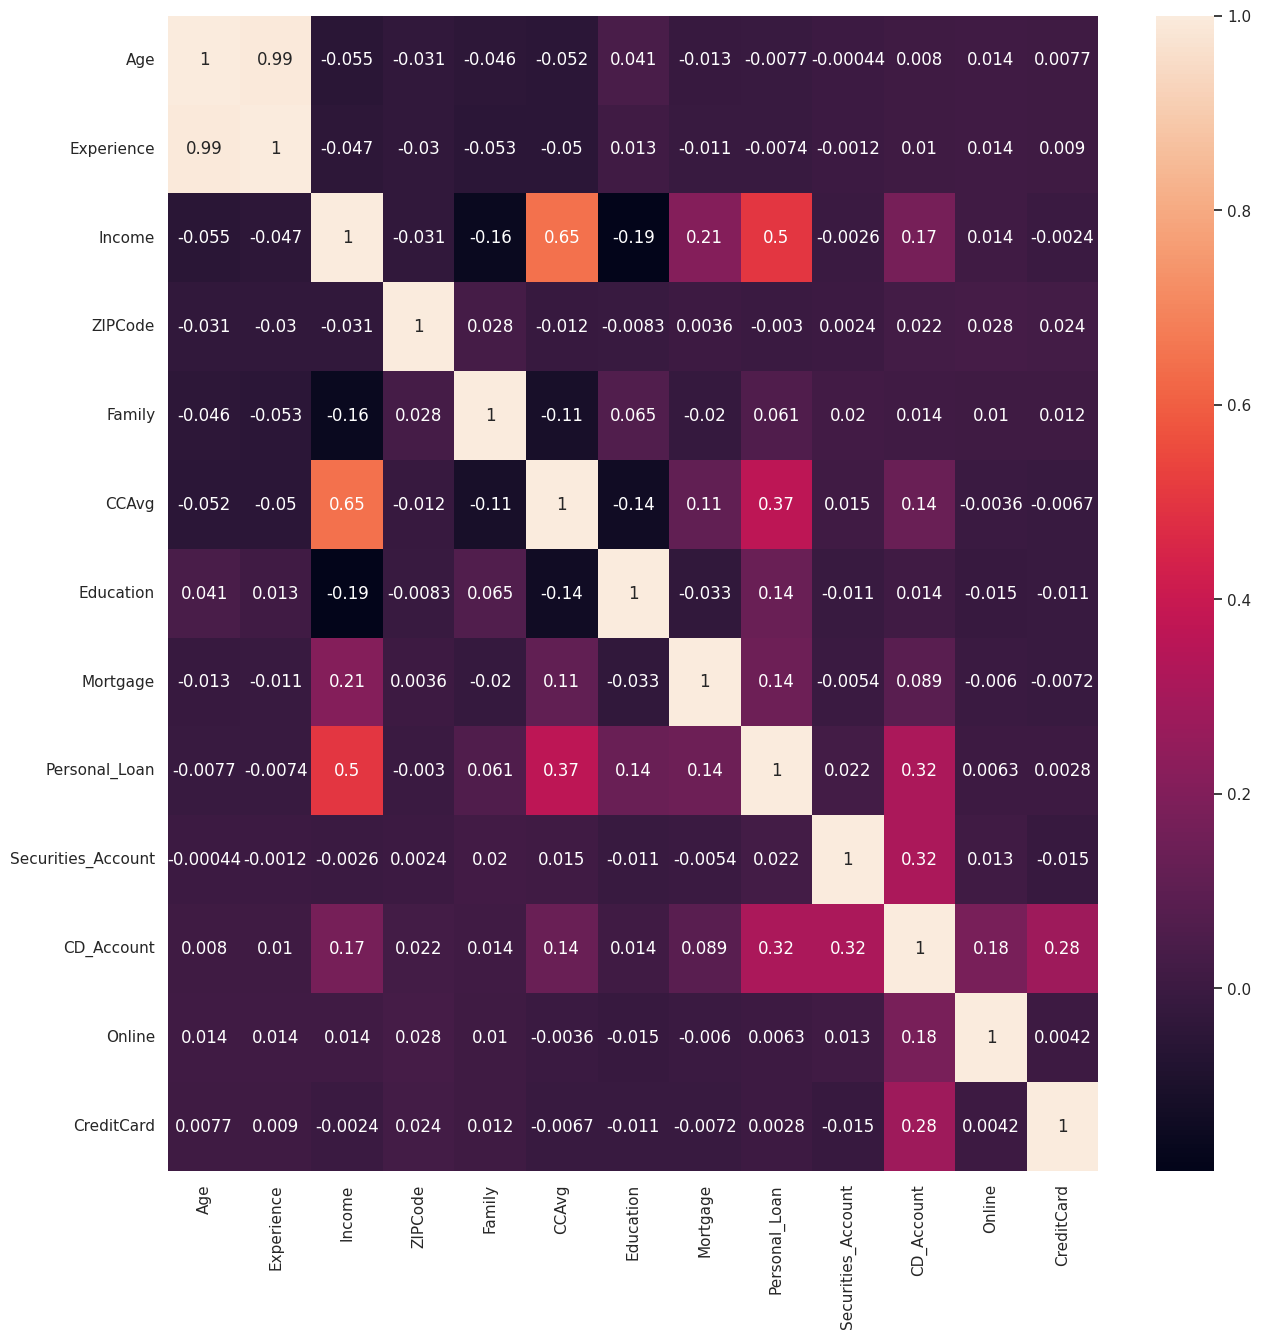

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data=df[['Age','Experience','Income', 'ZIPCode', 'Family', 'CCAvg', 'Education','Mortgage','Personal_Loan','Securities_Account', 'CD_Account', 'Online', 'CreditCard']].corr(), annot=True);


**CONCLUSION**:

1.   Age and Experience are highly correlated, therefore we can drop Experience from further consideration.
2.   ZIPCode and Family are not correlated with any of the other variables (there is only a slight negative correlation between Family, Income, and CCAvg).
3. The target variable Personal_Loan has a good correlation with Income and some correlation with CCAvg and CD_Account.
4.   For convenience, we split the heatmap above into three sub-maps (see below). This allows us to see better the correlations between variables.





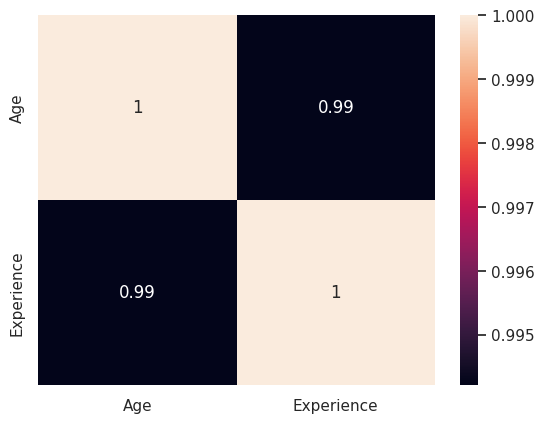

In [ ]:
sns.heatmap(data=df[['Age','Experience']].corr(), annot=True);


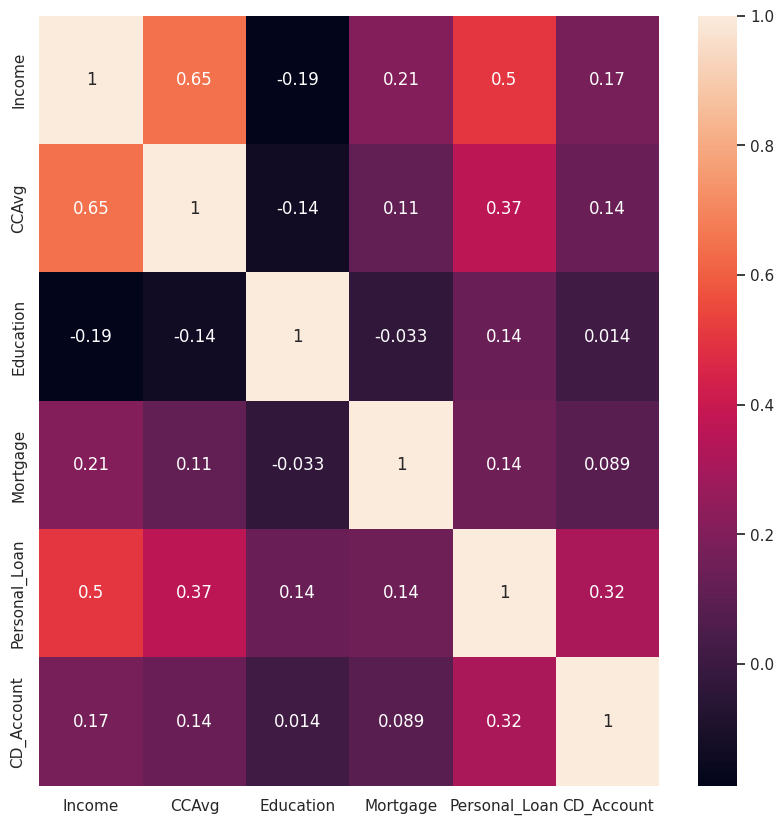

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data=df[['Income', 'CCAvg', 'Education','Mortgage','Personal_Loan','CD_Account']].corr(), annot=True);

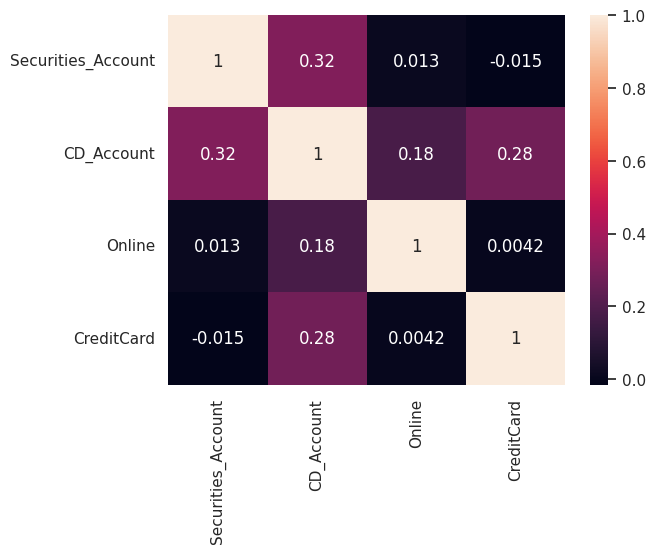

In [ ]:
sns.heatmap(data=df[['Securities_Account', 'CD_Account', 'Online', 'CreditCard']].corr(), annot=True);

**For convenience, we split the observations below into two groups: |correlation| >0.1 and |correlation| <0.1.**

#### Personal Loan vs Other Variables (|correlation|>0.1)

##### Personal Loan vs Income (correlation 0.5)

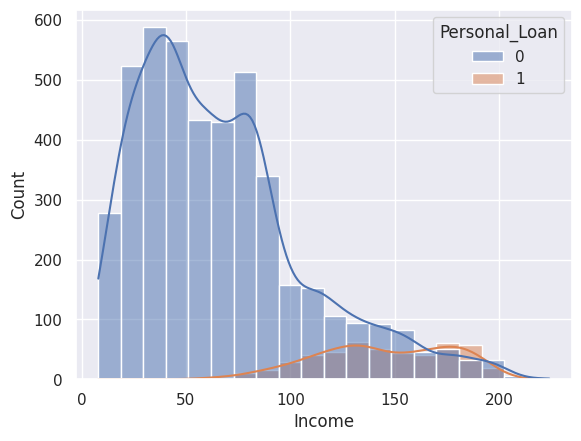

In [ ]:
sns.histplot(data=df, x='Income', hue='Personal_Loan', bins=20, kde=True);

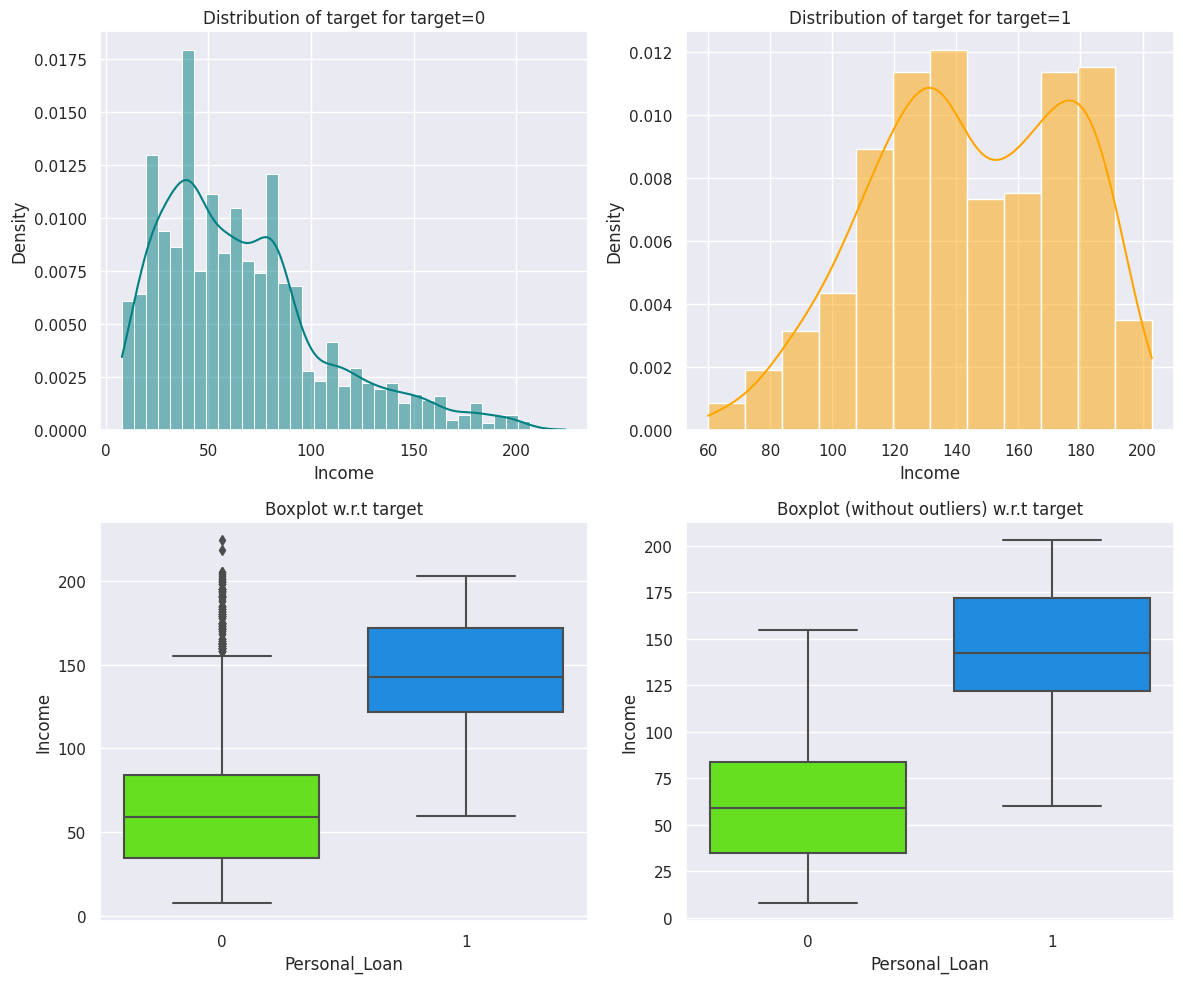

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

**CONCLUSION**:

The histogram for Income is skewed to the right for those customers who do not have a Personal Loan.

The histogram for Income is skewed to the left for those customers who have a Personal Loan.




##### Personal Loan vs CCAvg (correlation 0.37)

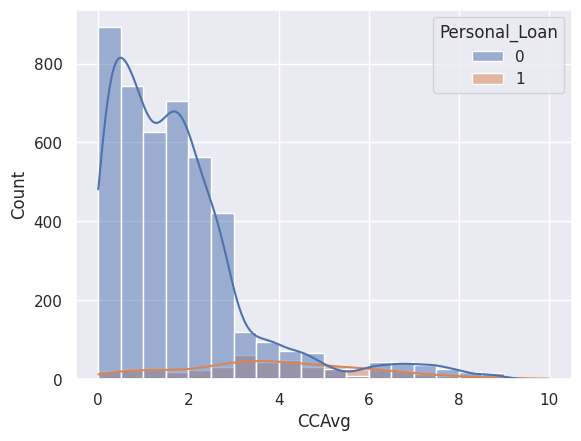

In [ ]:
sns.histplot(data=df, x='CCAvg', hue='Personal_Loan', bins=20, kde=True);

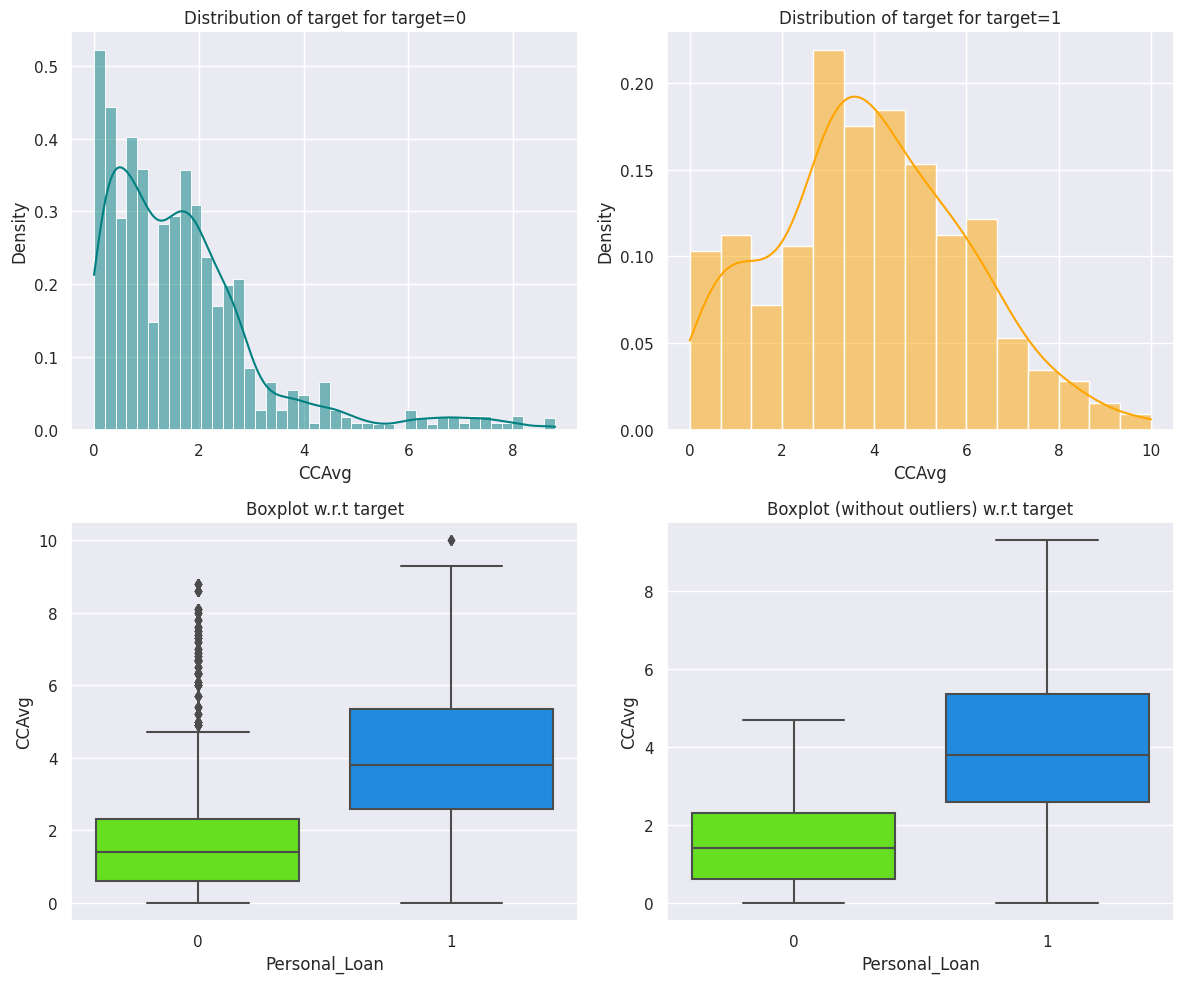

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

**CONCLUSION**:

The histogram for CCAvg is heavily skewed to the right for those customers who do not have a Personal Loan.

The histogram for CCAvg is slightly skewed to the right for those customers who have a Personal Loan.

##### Personal Loan vs Education  (correlation 0.14)

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


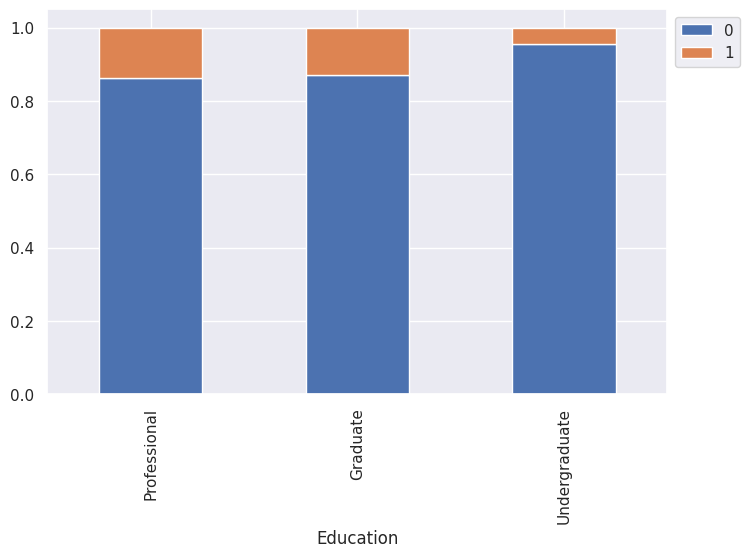

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

**CONCLUSION**: We see that only a very small percentage of customers with undergraduate degrees have personal loans.


##### Personal Loan vs Mortgage  (correlation 0.14)

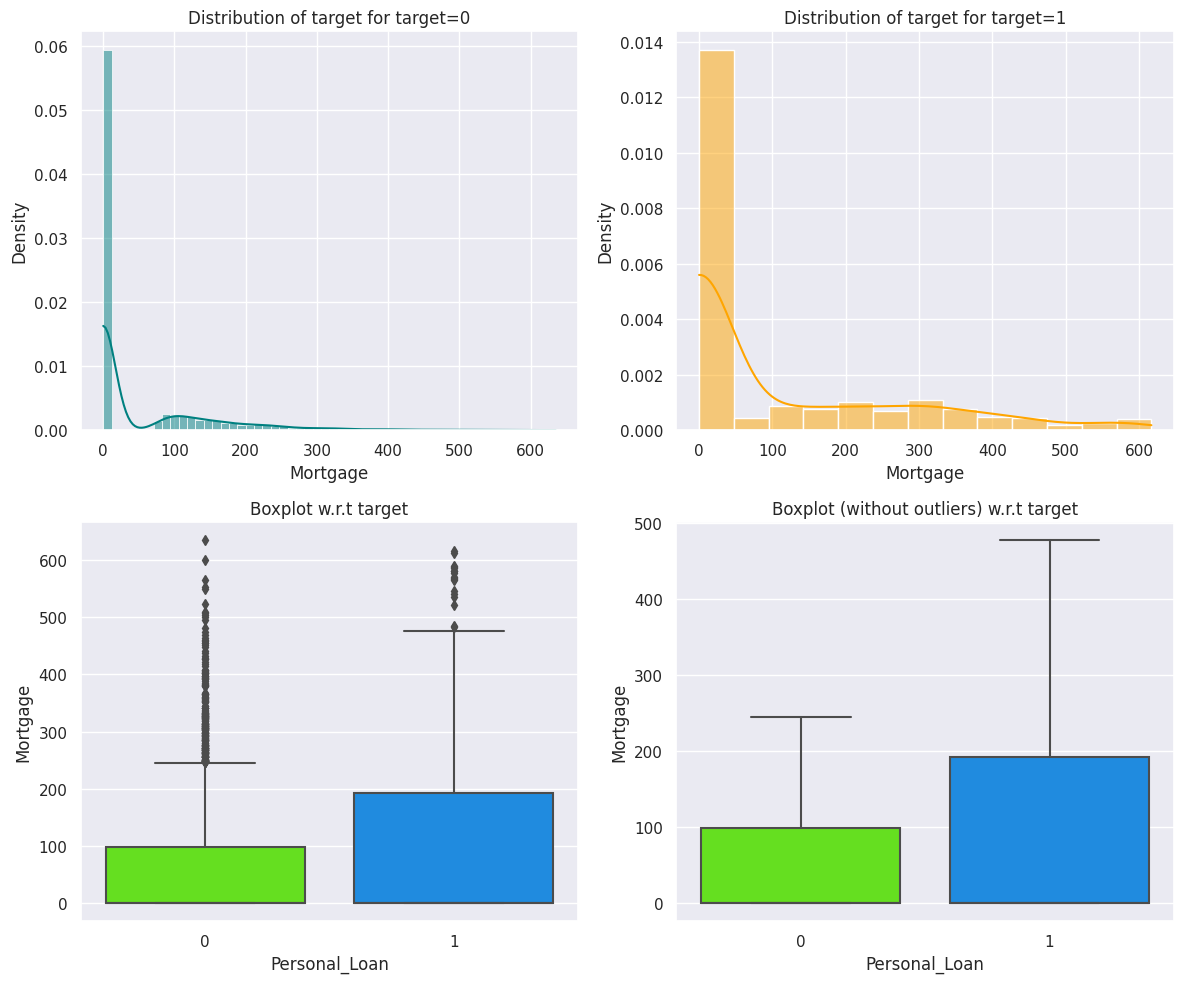

In [ ]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

**CONCLUSION**: Since most customers do not have mortgages, let us exclude these customers from the analysis (see below).


In [ ]:
dataMNZ=data[data['Mortgage']>0]

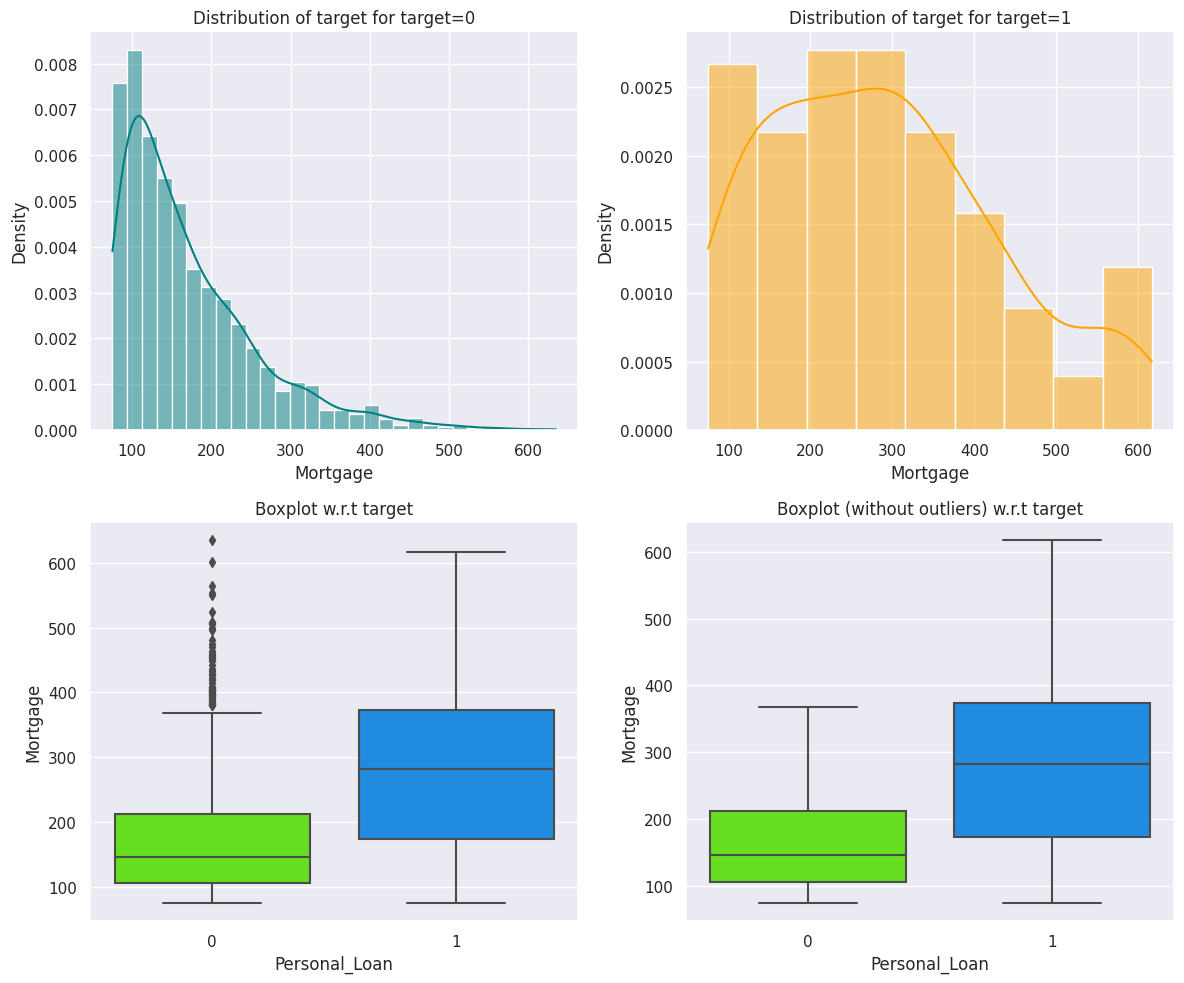

In [ ]:
distribution_plot_wrt_target(dataMNZ, "Mortgage", "Personal_Loan")

**CONCLUSION**:

The histogram for Mortgage is heavily skewed to the right for those customers who do not have a Personal Loan.

The histogram for Mortgage is slightly skewed to the right for those customers who have a Personal Loan.


We also notice that there are many outliers where customers have a mortgage, but do not have a personal loan. On the other hand, there are no outliers where customers have both a mortgage and a personal loan.

##### Personal Loan vs CD Account  (correlation 0.32)

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


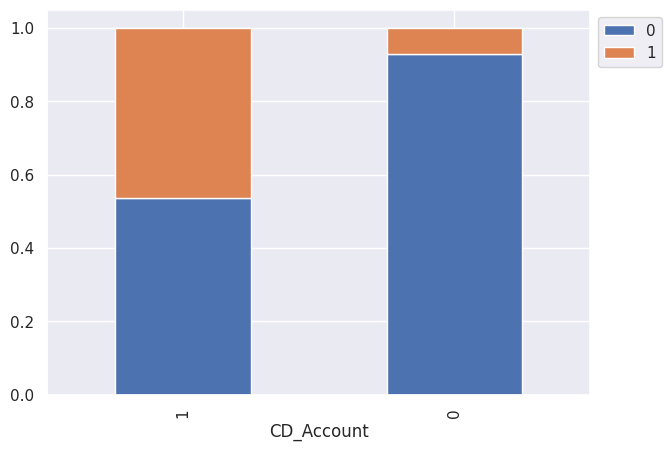

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

**CONCLUSION**:

About a half of customers with personal loans have CD accounts.

To the contrast, an overwhelming majority of customers who do not have personal loans also do not have CD accounts.


#### Personal Loan vs Other Variables (|correlation|<0.1)

##### Personal Loan vs Age (correlation -0.0077)

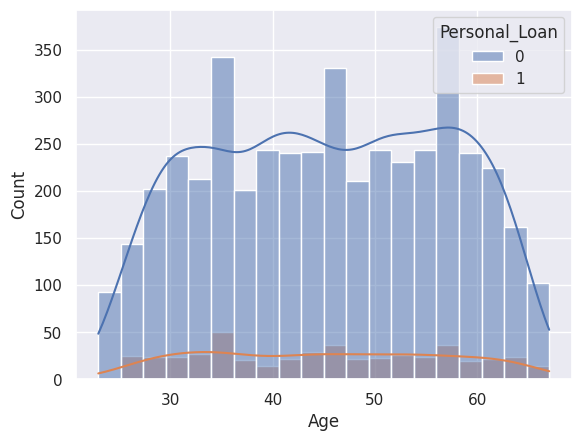

In [ ]:
sns.histplot(data=df, x='Age', hue='Personal_Loan', bins=20, kde=True);

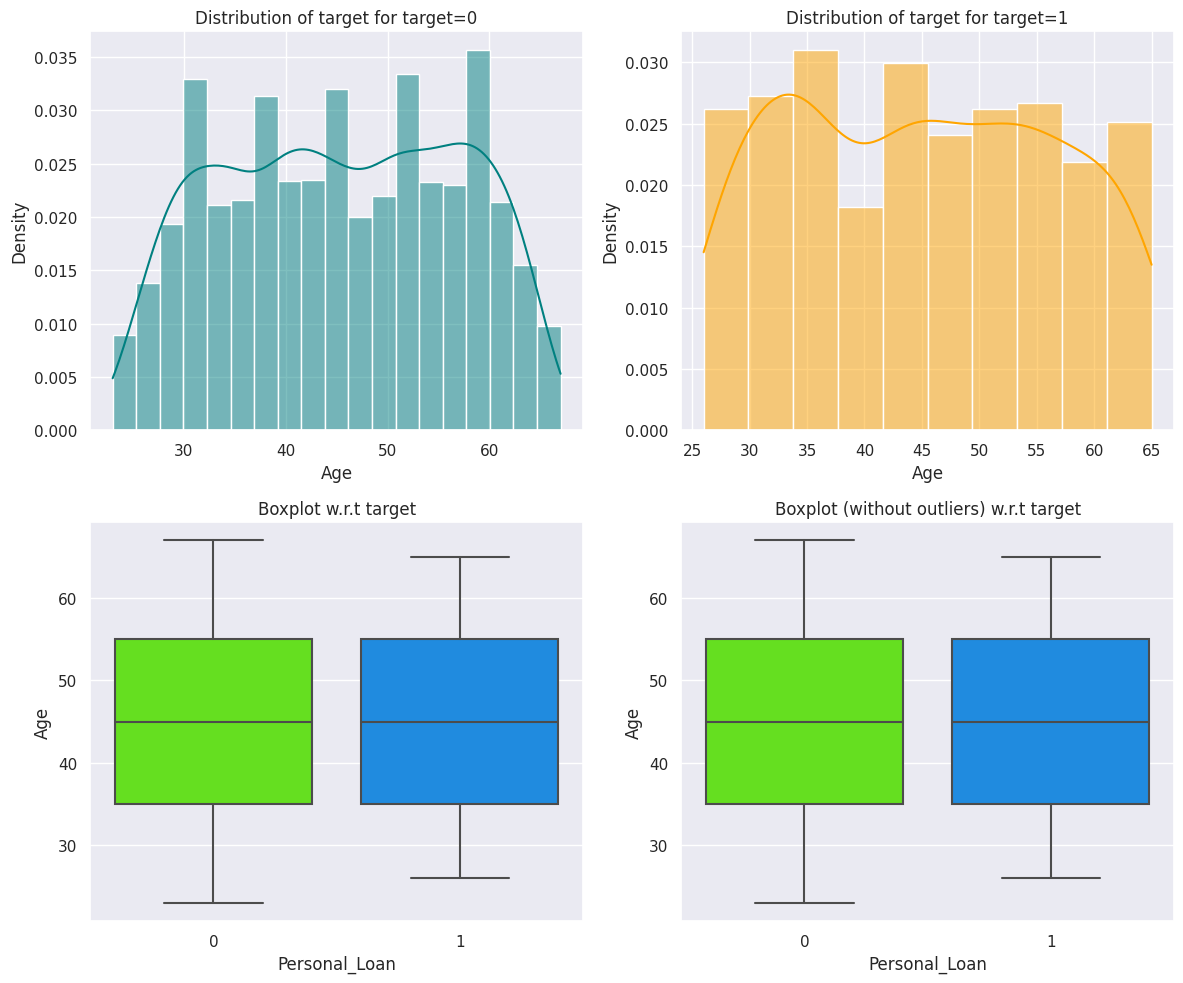

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**CONCLUSION**:

We can see that ages of customers with personal loans are distributed pretty much uniformly. On the other hand, among customers without personal loans there are lesser people who are younger that 30yo or older
that 60yo.

The boxplots look pretty much identical with the only difference of max and min.

##### Personal Loan vs Experience (correlation -0.0074)

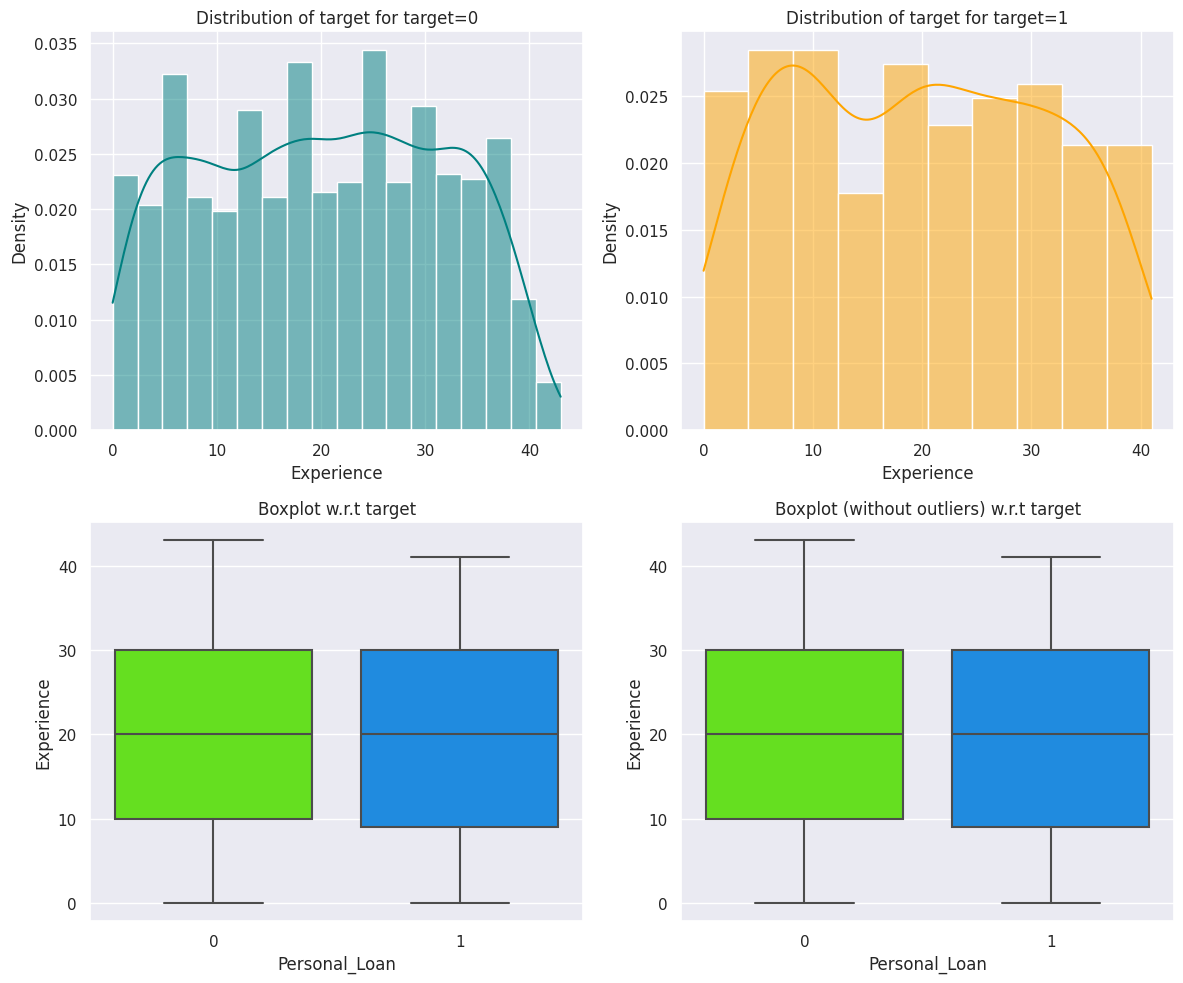

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

**CONCLUSION**:

We can see that Experience of customers with personal loans is distributed pretty much uniformly. On the other hand, among customers without personal loans there are lesser people who have more than 40y of experience.

The boxplots look pretty much identical with the only difference of max.

##### Personal Loan vs ZIPCode (correlation -0.003)

In [ ]:
data.groupby(['ZIPCode'])['Personal_Loan'].count()

ZIPCode
90005    5
90007    6
90009    8
90011    3
90016    2
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: Personal_Loan, Length: 467, dtype: int64

In [ ]:
data.groupby(['ZIPCode'])['Personal_Loan'].count().sort_values(ascending=False).head(20)

ZIPCode
94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
94025     52
91711     52
92093     51
90024     50
90245     50
91330     46
90089     46
92121     45
94304     45
94143     37
94608     34
95051     34
Name: Personal_Loan, dtype: int64

In [ ]:
data.groupby(['ZIPCode'])['Personal_Loan'].count().sort_values(ascending=False).tail(20)

ZIPCode
95482    2
95193    2
94575    2
94526    2
91207    2
90304    2
91129    2
90280    2
95005    2
96145    1
94087    1
90813    1
94404    1
92694    1
94598    1
93077    1
94965    1
90068    1
94970    1
91024    1
Name: Personal_Loan, dtype: int64

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


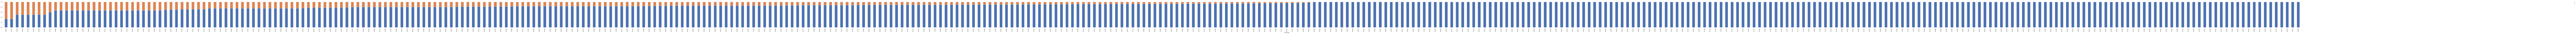

In [ ]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

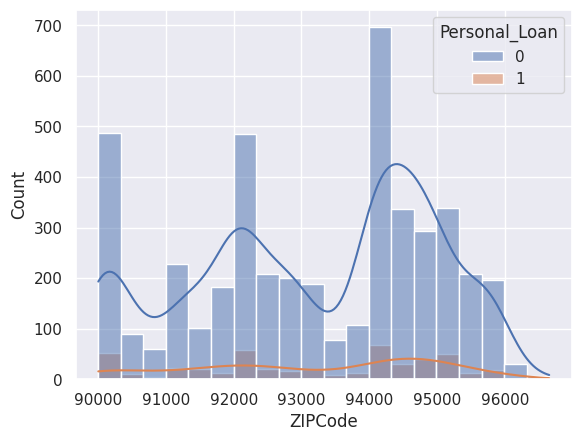

In [ ]:
sns.histplot(data=df, x='ZIPCode', hue='Personal_Loan', bins=20, kde=True);

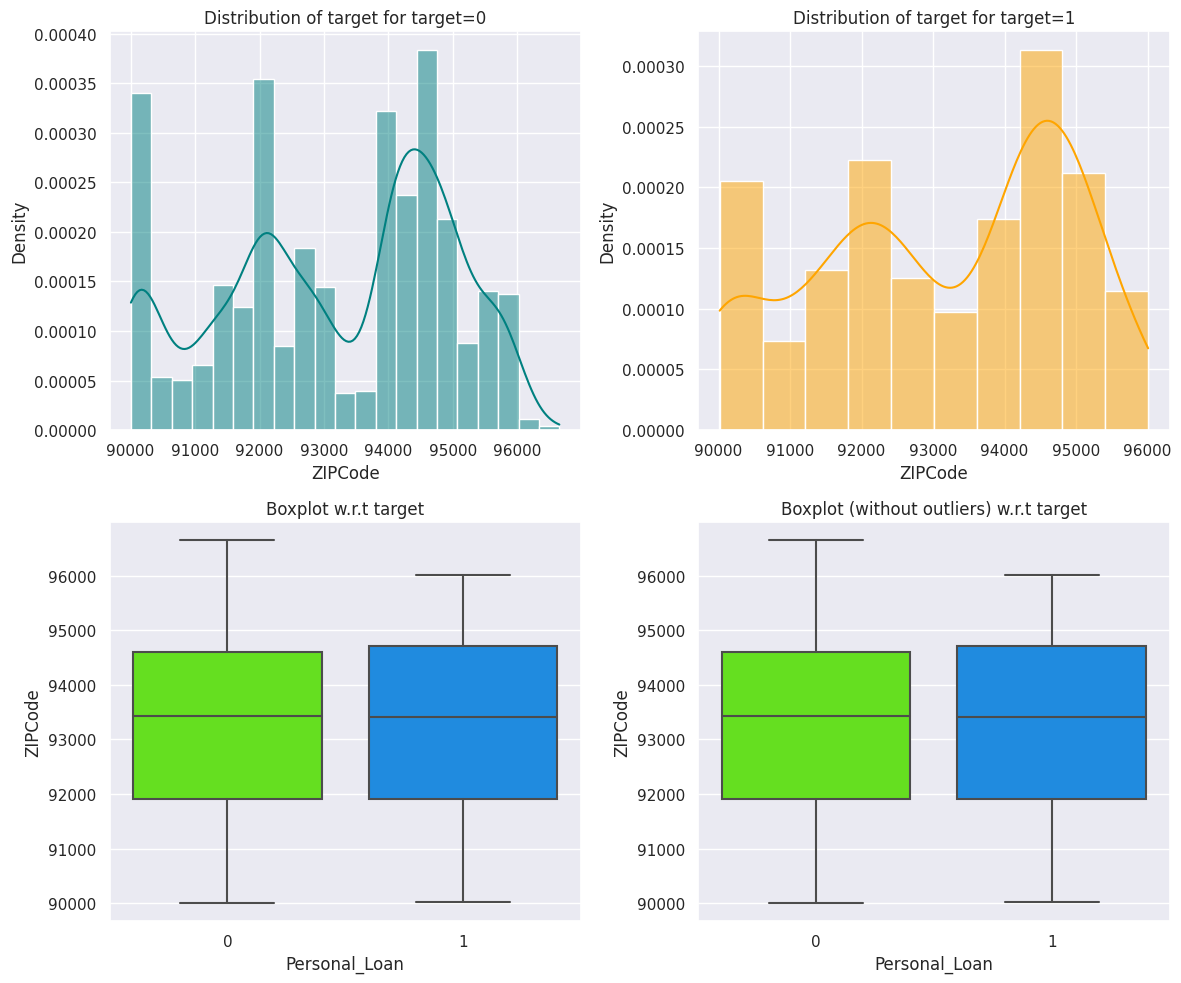

In [ ]:
distribution_plot_wrt_target(data, "ZIPCode", "Personal_Loan")

**CONCLUSION**:

We can see that in some regions there are many customers with personal loans.
And there are some regions where there are significantly lesser customers with personal loans. It is hard to draw any conclusion, since the given data does not provide any additional information about these regions.

##### Personal Loan vs Family (correlation 0.061)

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


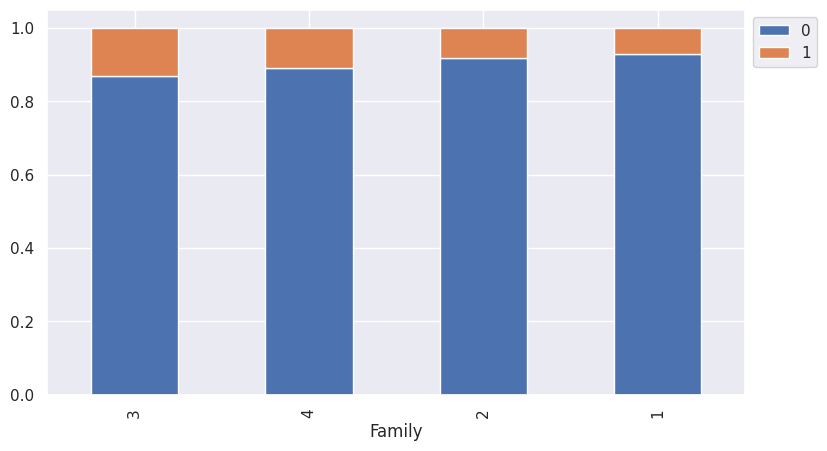

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

**CONCLUSION**:

The biggest disproportion between customers with personal loans and customers without personal loans is among singles.

##### Personal Loan vs Securities Account (correlation 0.022)

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


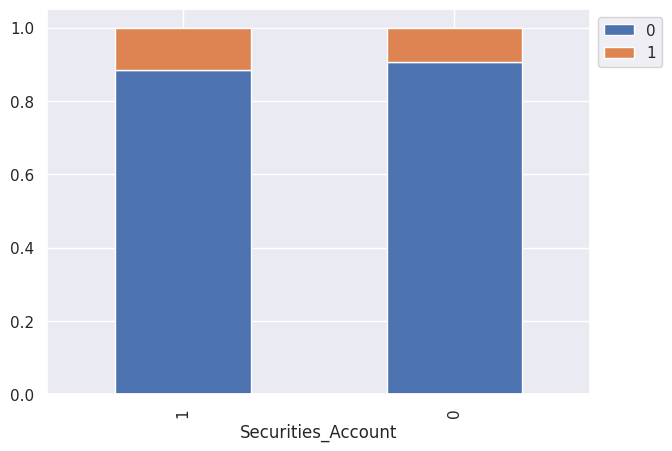

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

**CONCLUSION**:

The barplots look nearly identical.

##### Personal Loan vs Online (correlation 0.0063)

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


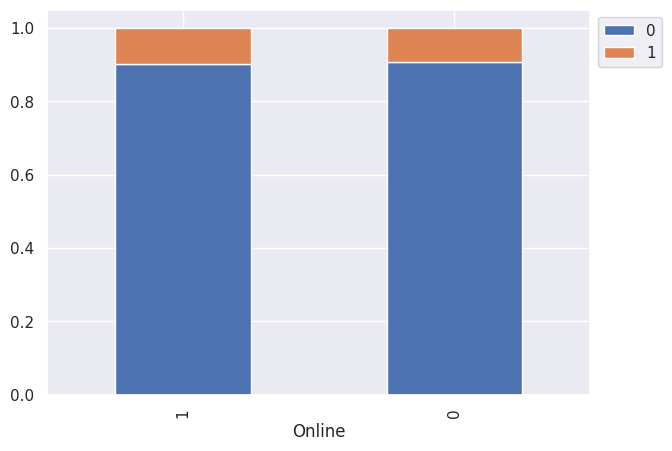

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan")

**CONCLUSION**:

The barplots look nearly identical.

##### Personal Loan vs Credit Card (correlation 0.0028)

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


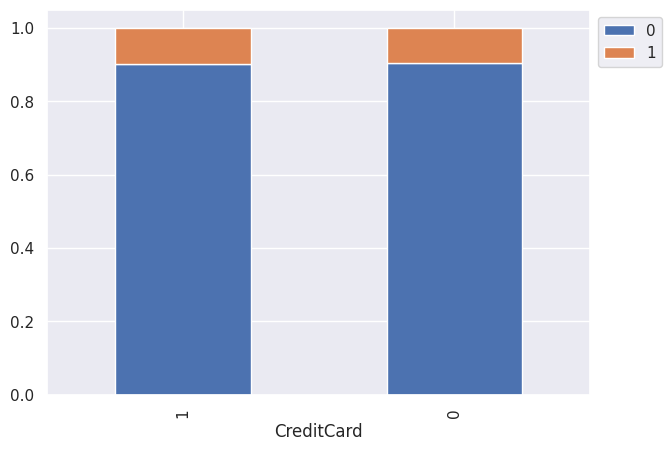

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

**CONCLUSION**:

The barplots look nearly identical.

## Data Preparation for Modeling

###Define independent and dependent variables

In [ ]:
#Since Age and Experience are highly correlated, we can drop Experience from further consideration.
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

###Creating dummy variables

In [ ]:
# creating dummy varibles on ZIPCode and Education
X = pd.get_dummies(X,
                   columns=["ZIPCode", "Education"],
                   drop_first=True)
X.head()

ID  Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  \
0   1   25      49       4    1.6         0                   1           0   
1   2   45      34       3    1.5         0                   1           0   
2   3   39      11       1    1.0         0                   0           0   
3   4   35     100       1    2.7         0                   0           0   
4   5   35      45       4    1.0         0                   0           0   

   Online  CreditCard  ZIPCode_90007  ZIPCode_90009  ZIPCode_90011  \
0       0           0              0              0              0   
1       0           0              0              0              0   
2       0           0              0              0              0   
3       0           0              0              0              0   
4       0           1              0              0              0   

   ZIPCode_90016  ZIPCode_90018  ZIPCode_90019  ZIPCode_90024  ZIPCode_90025  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90027  ZIPCode_90028  ZIPCode_90029  ZIPCode_90032  ZIPCode_90033  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90034  ZIPCode_90035  ZIPCode_90036  ZIPCode_90037  ZIPCode_90041  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90044  ZIPCode_90045  ZIPCode_90048  ZIPCode_90049  ZIPCode_90057  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90058  ZIPCode_90059  ZIPCode_90064  ZIPCode_90065  ZIPCode_90066  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90068  ZIPCode_90071  ZIPCode_90073  ZIPCode_90086  ZIPCode_90089  \
0              0              0              0              0              0   
1              0              0              0              0              1   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ZIPCode_90095  ZIPCode_90210  ZIPCode_90212  ZIPCode_90230  ZIPCode_90232  \
0              0              0              0              0              0   
1              0              0              0              0

In [ ]:
print(data.shape)
print(X.shape)

(5000, 14)
(5000, 478)


###Split the data into train and test

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500,)
Shape of test set :  (1500,)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan but in reality the customer will not take the personal loan - Loss of resources
2. Predicting a customer will not take the personal loan but in reality the customer was going to take the personal loan - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

### Model Building

####Important functions

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [ ]:
# here is a more extensive version of the above function
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

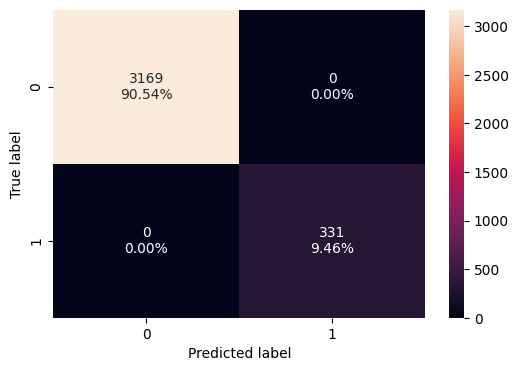

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train1 = get_recall_score(model, X_train, y_train)
print("Recall Score:", decision_tree_perf_train1)

Recall Score: 1.0


In [ ]:
decision_tree_perf_train2 = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train2

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

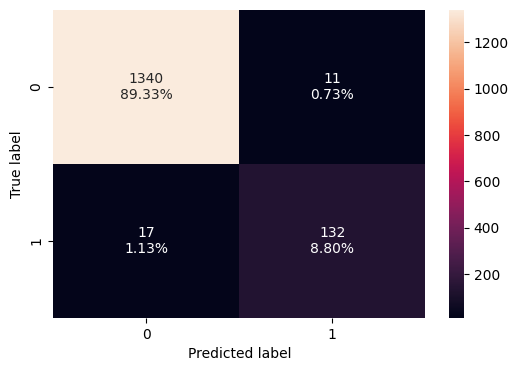

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test1 = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test1)

Recall Score: 0.8859060402684564


In [ ]:
decision_tree_perf_test2 = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test2

Accuracy    Recall  Precision       F1
0  0.981333  0.885906   0.923077  0.90411

#### Visualizing the Decision Tree

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

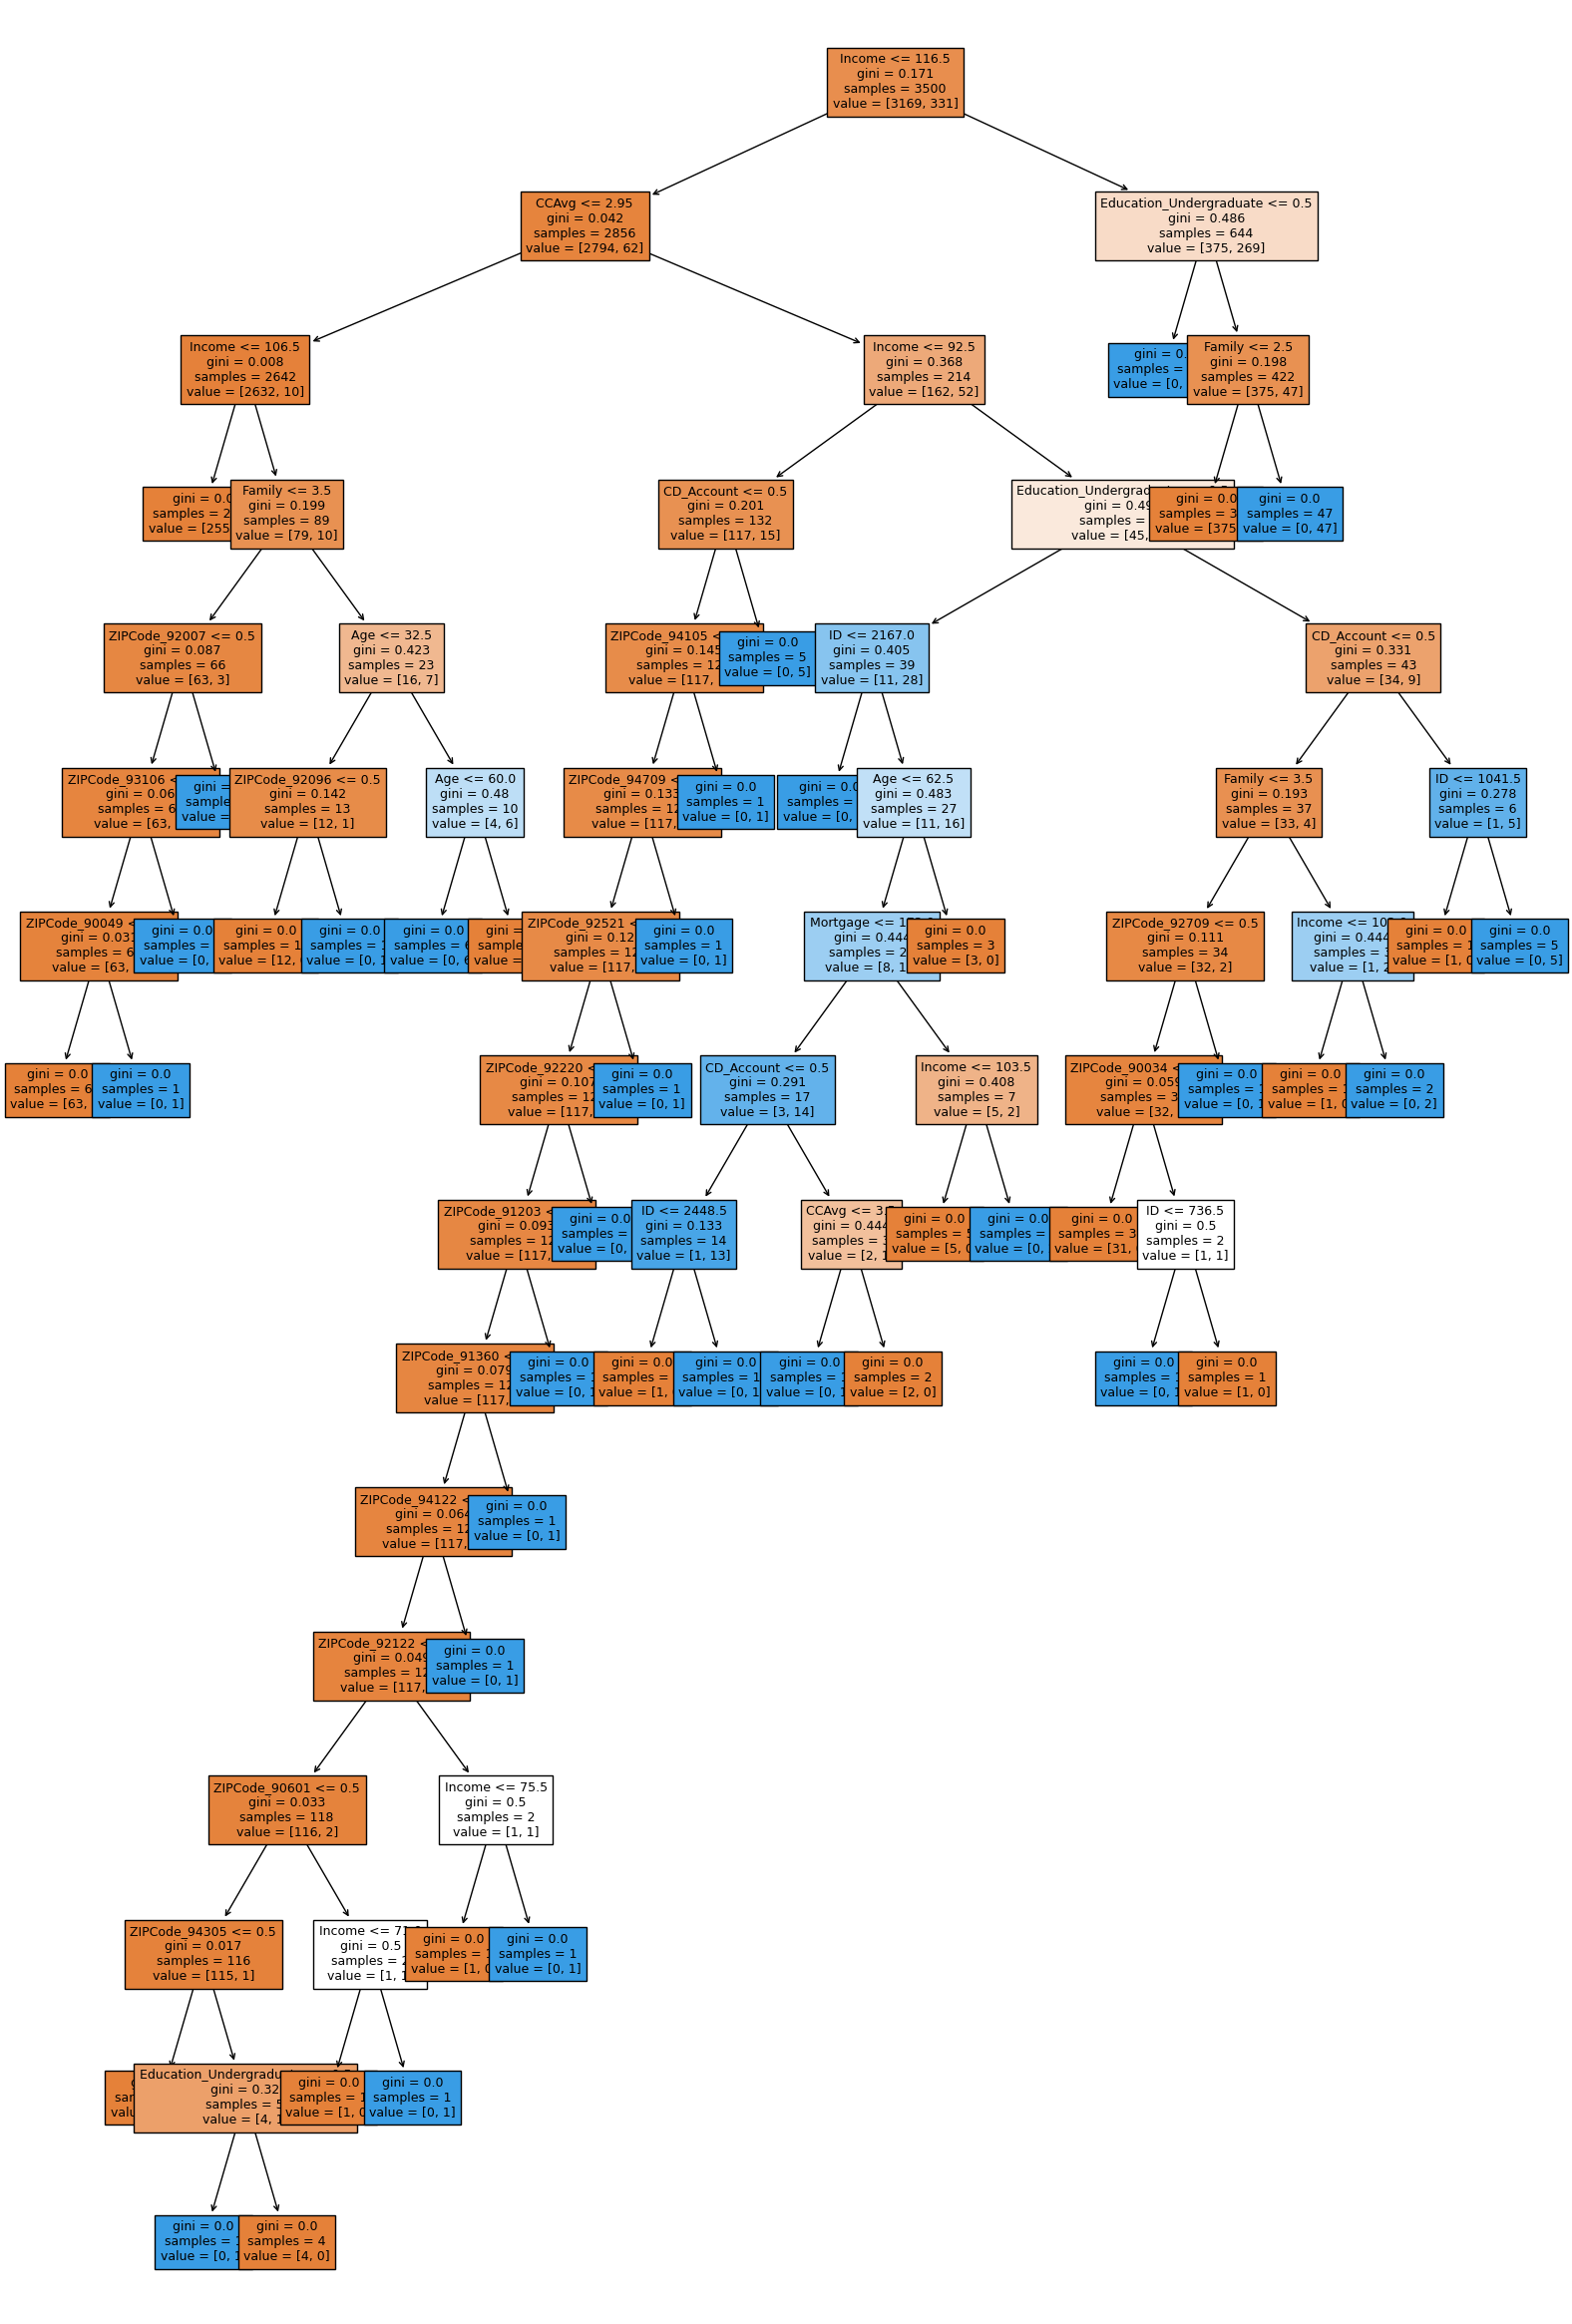

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- ZIPCode_92096 <= 0.50
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- ZIPCode_92096 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403621
Income                   0.308144
Family                   0.146572
CCAvg                    0.040021
CD_Account               0.025604
...                           ...
ZIPCode_92109            0.000000
ZIPCode_92106            0.000000
ZIPCode_92104            0.000000
ZIPCode_92103            0.000000
ZIPCode_93009            0.000000

[478 rows x 1 columns]


In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
indices

array([238, 320, 319, 318, 317, 316, 315, 314, 312, 311, 310, 309, 308,
       307, 306, 305, 304, 303, 302, 300, 299, 298, 297, 296, 295, 294,
       321, 293, 322, 324, 350, 349, 348, 347, 346, 345, 344, 343, 342,
       341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329,
       328, 327, 326, 323, 351, 292, 290, 260, 259, 258, 257, 256, 255,
       254, 253, 252, 251, 249, 248, 247, 246, 245, 244, 243, 242, 241,
       240, 239, 476, 237, 236, 469, 261, 291, 262, 264, 289, 288, 287,
       286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274,
       273, 272, 271, 270, 269, 268, 267, 266, 265, 263, 352, 353, 354,
       439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427,
       426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 440,
       414, 441, 443, 468, 467, 466, 465, 464, 463, 462, 461, 460, 459,
       458, 457, 456, 455, 454, 453, 452, 451, 450, 449, 448, 447, 446,
       445, 444, 442, 413, 412, 411, 380, 379, 378, 377, 376, 37

In [ ]:
indices=[250,  31,   5,   0,   1,   7,   4,   3,   2, 477]

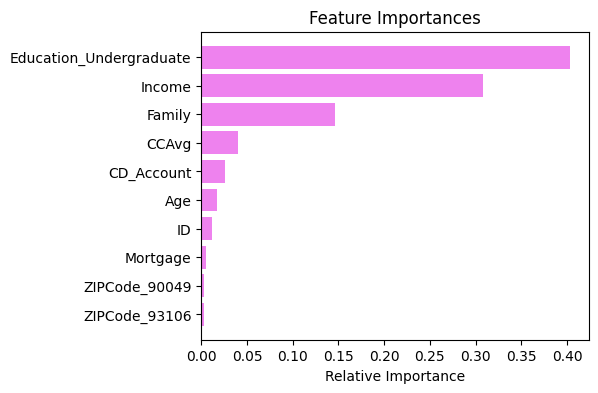

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the decision tree model, Education_Undergraduate is the most important variable for predicting the Personal Loan.

### Model Performance Improvement

#### Pre-Pruning (Reducing over fitting, Version 1)

In [ ]:
# Choose the type of classifier.
estimator1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=1e-05, random_state=1)

##### **Checking performance on training set**

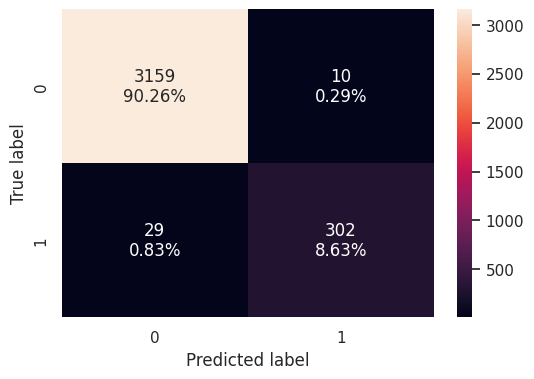

In [ ]:
confusion_matrix_sklearn(estimator1, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train11 = get_recall_score(estimator1, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train11)

Recall Score: 0.9123867069486404


In [ ]:
decision_tree_tune_perf_train21 = model_performance_classification_sklearn(estimator1, X_train, y_train)
decision_tree_tune_perf_train21

Accuracy    Recall  Precision        F1
0  0.988857  0.912387   0.967949  0.939347

##### **Checking model performance on test data**

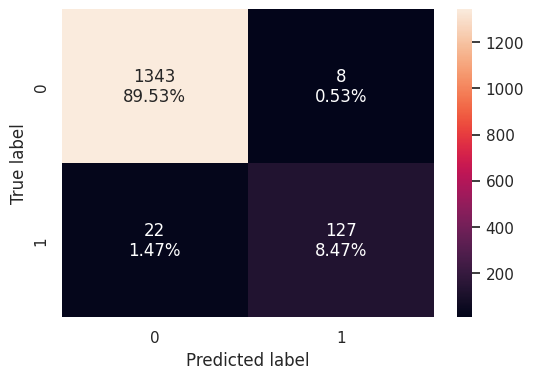

In [ ]:
confusion_matrix_sklearn(estimator1, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test11 = get_recall_score(estimator1, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test11)

Recall Score: 0.8523489932885906


In [ ]:
decision_tree_tune_perf_test21 = model_performance_classification_sklearn(estimator1, X_test, y_test)
decision_tree_tune_perf_test21

Accuracy    Recall  Precision        F1
0      0.98  0.852349   0.940741  0.894366

##### **Visualizing the Decision Tree**

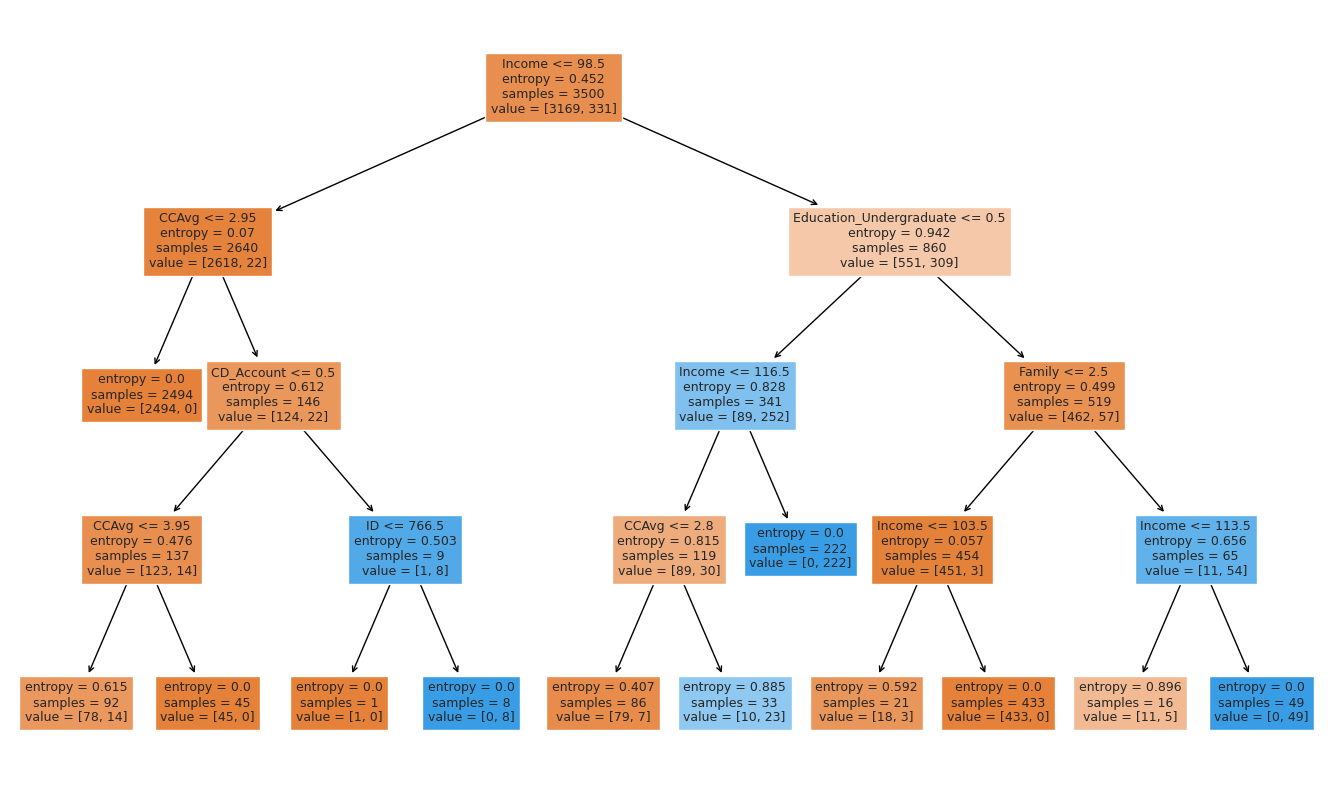

In [ ]:
plt.figure(figsize=(17, 10))
out = tree.plot_tree(
    estimator1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator1, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [78.00, 14.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [45.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- ID <= 766.50
|   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- ID >  766.50
|   |   |   |   |--- weights: [0.00, 8.00] class: 1
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [79.00, 7.00] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [10.00, 23.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [18.00, 3.00] c

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.568144
Education_Undergraduate  0.187454
Family                   0.132960
CCAvg                    0.094631
CD_Account               0.013651
...                           ...
ZIPCode_92101            0.000000
ZIPCode_92096            0.000000
ZIPCode_92093            0.000000
ZIPCode_92084            0.000000
ZIPCode_93009            0.000000

[478 rows x 1 columns]


In [ ]:
importances = estimator1.feature_importances_
indices = np.argsort(importances)
indices

array([238, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310,
       309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297,
       322, 323, 324, 325, 351, 350, 349, 348, 347, 346, 345, 344, 343,
       342, 341, 340, 296, 339, 337, 336, 335, 334, 333, 332, 331, 330,
       329, 328, 327, 326, 338, 352, 295, 293, 262, 261, 260, 259, 258,
       257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245,
       244, 243, 242, 241, 240, 239, 476, 263, 264, 265, 266, 292, 291,
       290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 294, 280, 278,
       277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 279, 237,
       353, 355, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429,
       428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416,
       415, 440, 441, 442, 443, 469, 468, 467, 466, 465, 464, 463, 462,
       461, 460, 459, 458, 414, 457, 455, 454, 453, 452, 451, 450, 449,
       448, 447, 446, 445, 444, 456, 354, 413, 411, 380, 379, 37

In [ ]:
indices=[150, 149, 161, 471,   0,   7,   4,   3, 477,   2]

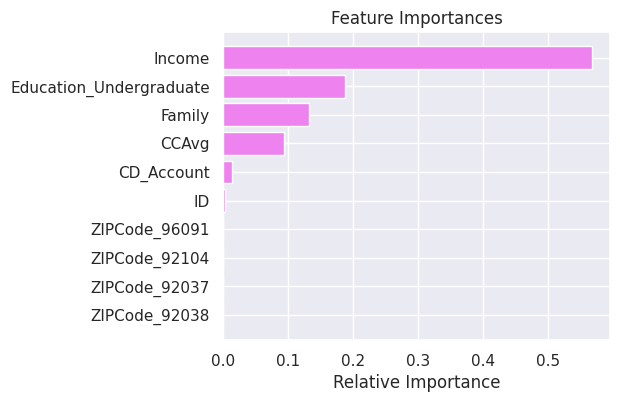

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Pre-Pruning (Reducing over fitting, Version 2)

We now try different set of parameters

In [ ]:
# Choose the type of classifier.
estimator2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(4, 10),
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "max_leaf_nodes": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator2, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=1)

##### **Checking performance on training set**

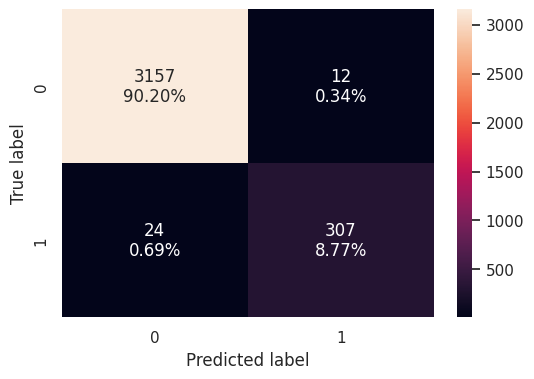

In [ ]:
confusion_matrix_sklearn(estimator2, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train12 = get_recall_score(estimator2, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train12)

Recall Score: 0.9274924471299094


In [ ]:
decision_tree_tune_perf_train22 = model_performance_classification_sklearn(estimator2, X_train, y_train)
decision_tree_tune_perf_train22

Accuracy    Recall  Precision        F1
0  0.989714  0.927492   0.962382  0.944615

##### **Checking model performance on test data**

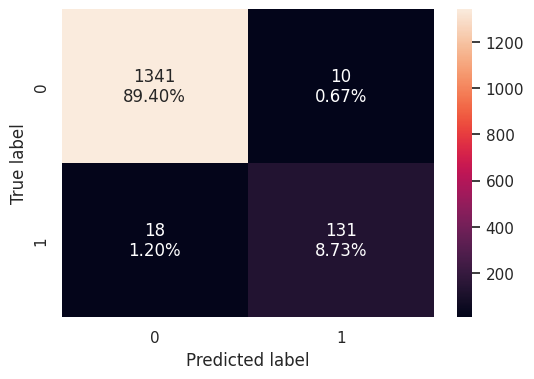

In [ ]:
confusion_matrix_sklearn(estimator2, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test12 = get_recall_score(estimator2, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test12)

Recall Score: 0.8791946308724832


In [ ]:
decision_tree_tune_perf_test22 = model_performance_classification_sklearn(estimator2, X_test, y_test)
decision_tree_tune_perf_test22

Accuracy    Recall  Precision        F1
0  0.981333  0.879195   0.929078  0.903448

##### **Visualizing the Decision Tree**

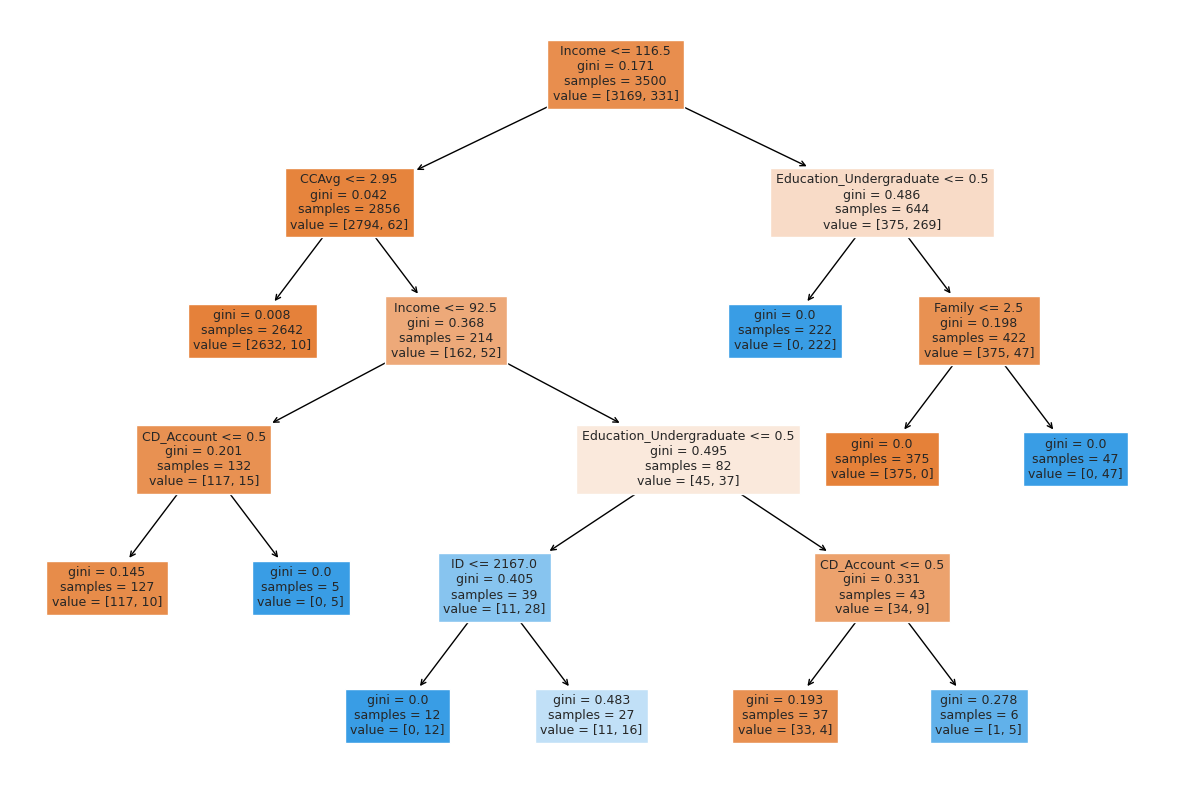

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator2, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- ID <= 2167.00
|   |   |   |   |   |--- weights: [0.00, 12.00] class: 1
|   |   |   |   |--- ID >  2167.00
|   |   |   |   |   |--- weights: [11.00, 16.00] class: 1
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.445708
Income                   0.327032
Family                   0.154915
CCAvg                    0.042015
CD_Account               0.025216
...                           ...
ZIPCode_92101            0.000000
ZIPCode_92096            0.000000
ZIPCode_92093            0.000000
ZIPCode_92084            0.000000
ZIPCode_93009            0.000000

[478 rows x 1 columns]


In [ ]:
importances = estimator2.feature_importances_
indices = np.argsort(importances)
indices

array([238, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310,
       309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297,
       322, 323, 324, 325, 351, 350, 349, 348, 347, 346, 345, 344, 343,
       342, 341, 340, 296, 339, 337, 336, 335, 334, 333, 332, 331, 330,
       329, 328, 327, 326, 338, 352, 295, 293, 262, 261, 260, 259, 258,
       257, 256, 255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245,
       244, 243, 242, 241, 240, 239, 476, 263, 264, 265, 266, 292, 291,
       290, 289, 288, 287, 286, 285, 284, 283, 282, 281, 294, 280, 278,
       277, 276, 275, 274, 273, 272, 271, 270, 269, 268, 267, 279, 237,
       353, 355, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429,
       428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418, 417, 416,
       415, 440, 441, 442, 443, 469, 468, 467, 466, 465, 464, 463, 462,
       461, 460, 459, 458, 414, 457, 455, 454, 453, 452, 451, 450, 449,
       448, 447, 446, 445, 444, 456, 354, 413, 411, 380, 379, 37

In [ ]:
indices=[150, 149, 161, 471,   0,   7,   4,   3,   2, 477]

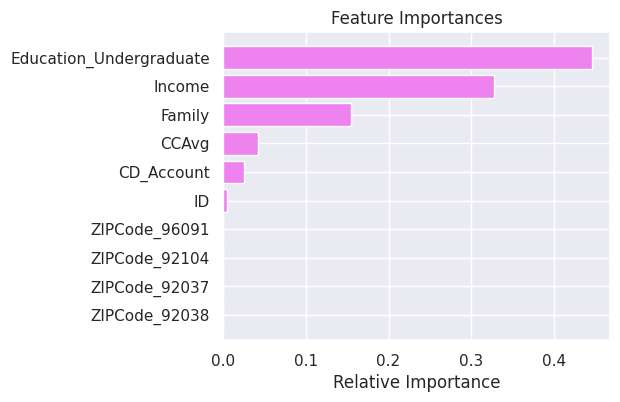

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Cost-Complexity Pruning

#####**Total impurity of leaves vs effective alphas of pruned tree**


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000277    0.000554
2     0.000279    0.002226
3     0.000381    0.002606
4     0.000381    0.002987
5     0.000476    0.003464
6     0.000513    0.007057
7     0.000515    0.008087
8     0.000522    0.008609
9     0.000527    0.009136
10    0.000545    0.010773
11    0.000582    0.011355
12    0.000771    0.013668
13    0.000788    0.014456
14    0.000882    0.017985
15    0.001552    0.019536
16    0.002333    0.021869
17    0.003024    0.024893
18    0.003294    0.028187
19    0.006473    0.034659
20    0.023866    0.058525
21    0.056365    0.171255

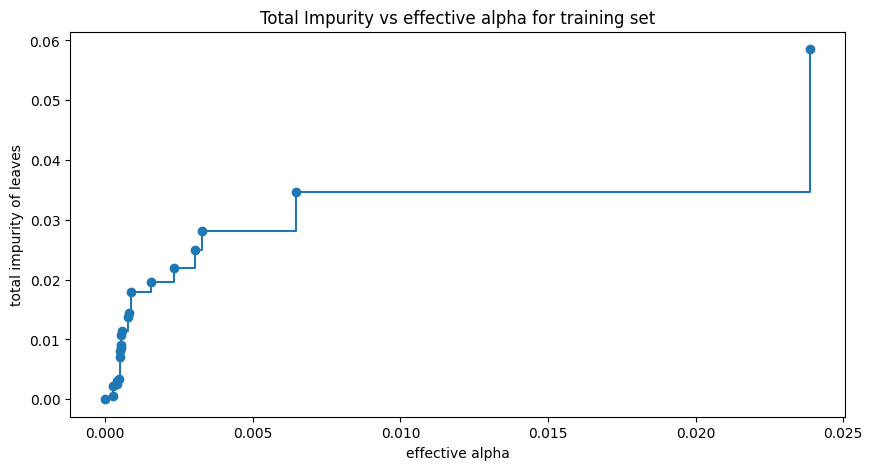

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


We now show that the number of nodes and tree depth decreases as alpha increases.

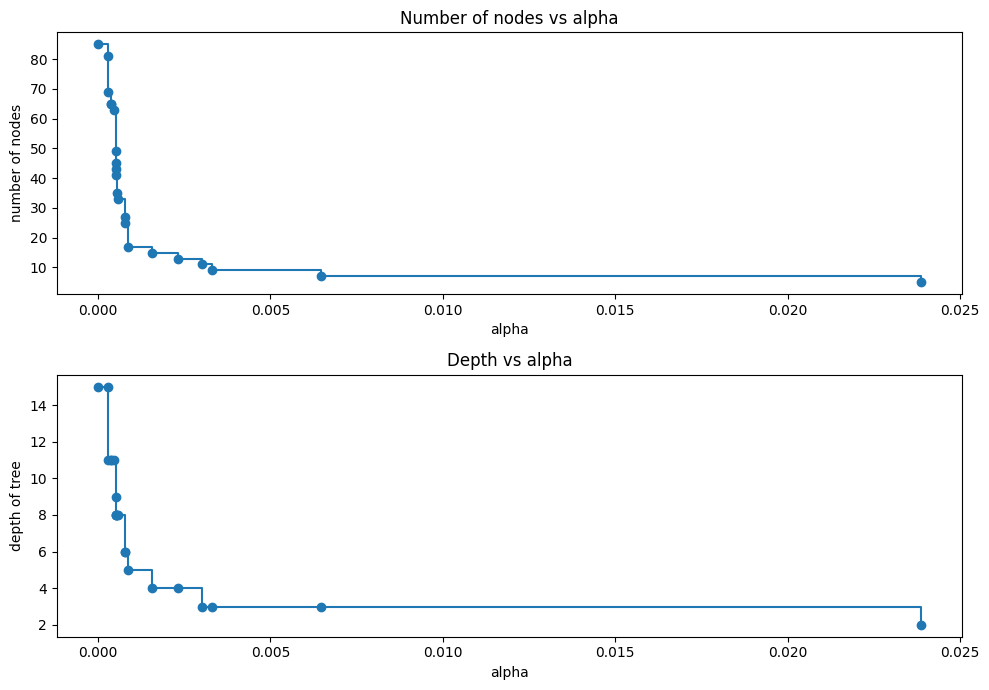

In [ ]:
#We remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#####**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
train_scores

[1.0,
 0.9997142857142857,
 0.9988571428571429,
 0.9982857142857143,
 0.9982857142857143,
 0.998,
 0.996,
 0.9954285714285714,
 0.9951428571428571,
 0.9948571428571429,
 0.994,
 0.9937142857142857,
 0.9914285714285714,
 0.9914285714285714,
 0.9897142857142858,
 0.9885714285714285,
 0.9871428571428571,
 0.9822857142857143,
 0.9822857142857143,
 0.9822857142857143,
 0.9688571428571429]

In [ ]:
test_scores = [clf.score(X_test, y_test) for clf in clfs]
test_scores

[0.9813333333333333,
 0.9813333333333333,
 0.9813333333333333,
 0.9813333333333333,
 0.9813333333333333,
 0.982,
 0.982,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9826666666666667,
 0.9826666666666667,
 0.9826666666666667,
 0.9813333333333333,
 0.9813333333333333,
 0.98,
 0.9753333333333334,
 0.9753333333333334,
 0.9753333333333334,
 0.962]

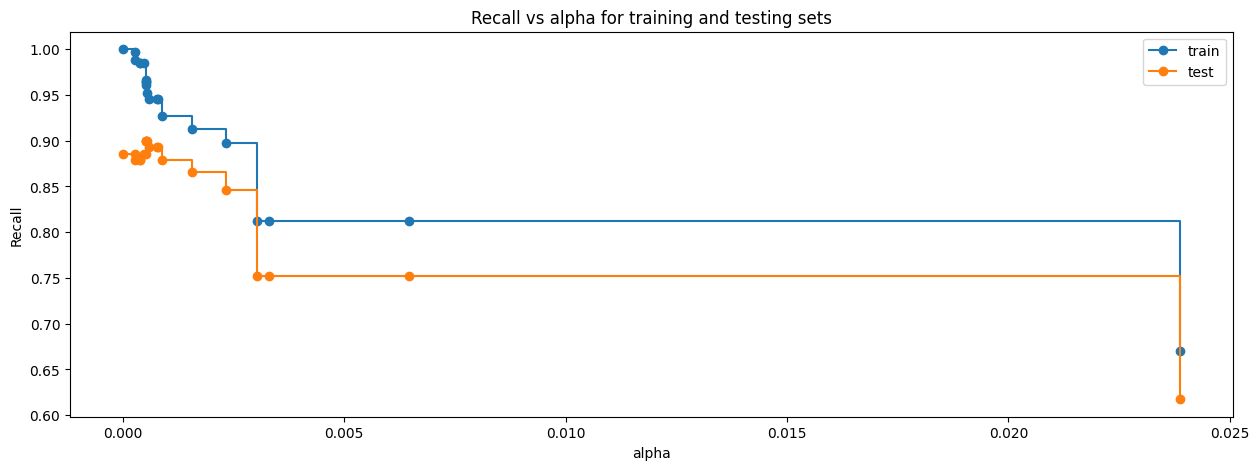

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**If we look at this graph going from the right to the left, we notice that the performance is about the same up to a point which is close to 0.001. After this point overfitting begins: Recall starts increasing on the train data and decreasing on the test data. So, we can choose alpha approximately 0.001 (the exact value we find below) retaining information and getting higher recall.**

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005154061624649861, random_state=1)


#### Post-Pruning

#####**Creating model with 0.0005 ccp_alpha**

In [ ]:
best_model = DecisionTreeClassifier(
    ccp_alpha=0.0005154061624649861, random_state=1
)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005154061624649861, random_state=1)

#####**Checking performance on the training set**

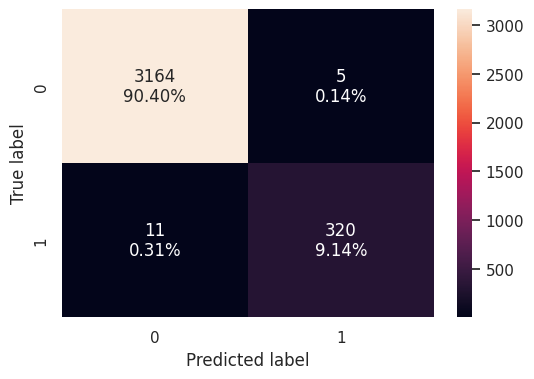

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train1 = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train1)

Recall Score: 0.9667673716012085


In [ ]:
decision_tree_postpruned_perf_train2 = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_postpruned_perf_train2

Accuracy    Recall  Precision       F1
0  0.995429  0.966767   0.984615  0.97561

#####**Checking performance on the test set**

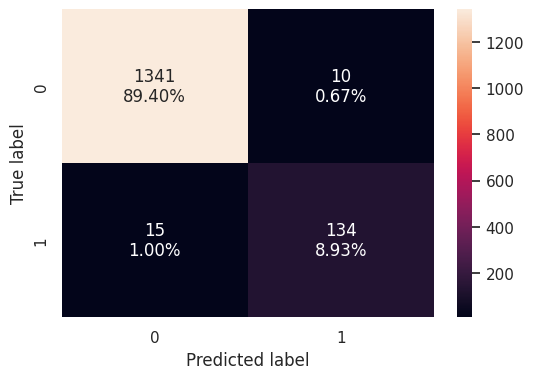

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test1 = get_recall_score(best_model, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test1)

Recall Score: 0.8993288590604027


In [ ]:
decision_tree_postpruned_perf_test2 = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_postpruned_perf_test2

Accuracy    Recall  Precision        F1
0  0.983333  0.899329   0.930556  0.914676

**CONCLUSION:** The best model recall score is 0.8993 which is the best so far.

#####**Visualizing the Decision Tree**

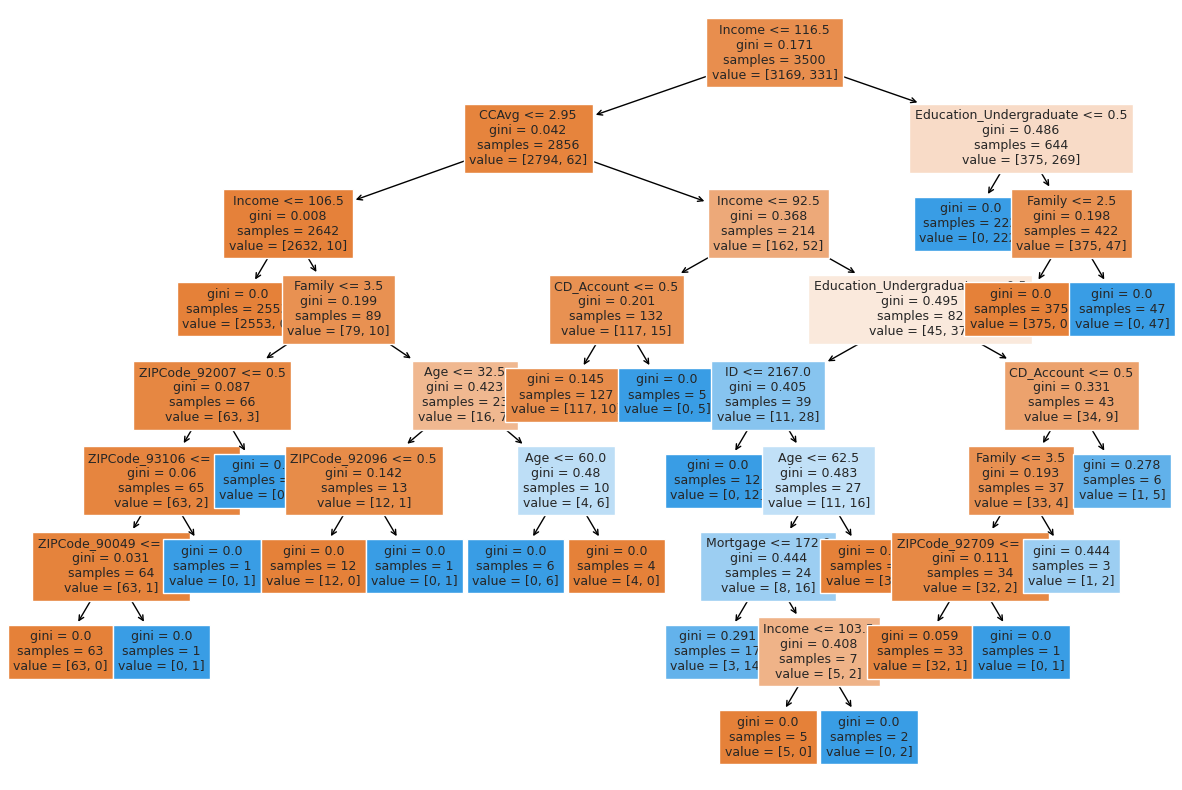

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- ZIPCode_92096 <= 0.50
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- ZIPCode_92096 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False).head()
)

                              Imp
Education_Undergraduate  0.420825
Income                   0.317580
Family                   0.153837
CCAvg                    0.039670
CD_Account               0.023808


In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
indices

array([238, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309,
       308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297, 296,
       321, 295, 322, 324, 349, 348, 347, 346, 345, 344, 343, 342, 341,
       340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328,
       327, 326, 325, 323, 294, 293, 292, 261, 260, 259, 258, 257, 256,
       255, 254, 253, 252, 251, 249, 248, 247, 246, 245, 244, 243, 242,
       241, 240, 239, 476, 237, 236, 262, 263, 264, 265, 291, 290, 289,
       288, 287, 286, 285, 284, 283, 282, 281, 280, 350, 279, 277, 276,
       275, 274, 273, 272, 271, 270, 269, 268, 267, 266, 278, 351, 352,
       353, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426,
       425, 424, 423, 422, 421, 420, 419, 418, 417, 416, 415, 414, 413,
       438, 439, 440, 441, 467, 466, 465, 464, 463, 462, 461, 460, 459,
       458, 457, 456, 412, 455, 453, 452, 451, 450, 449, 448, 447, 446,
       445, 444, 443, 442, 454, 235, 411, 409, 378, 377, 376, 37

In [ ]:
indices=[250,  31,   0,   5,   1,   7,   4,   3,   2, 477]

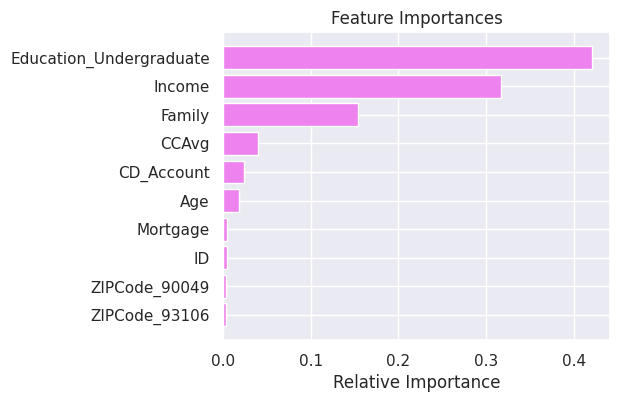

In [ ]:
plt.figure(figsize=(5, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train2.T, decision_tree_tune_perf_train21.T,decision_tree_tune_perf_train22.T,decision_tree_postpruned_perf_train2.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree-1 (Pre-Pruning)","Decision Tree-2 (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree-1 (Pre-Pruning)  \
Accuracy                     1.0                       0.988857   
Recall                       1.0                       0.912387   
Precision                    1.0                       0.967949   
F1                           1.0                       0.939347   

           Decision Tree-2 (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                        0.989714                      0.995429  
Recall                          0.927492                      0.966767  
Precision                       0.962382                      0.984615  
F1                              0.944615                      0.975610

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test2.T, decision_tree_tune_perf_test21.T,decision_tree_tune_perf_test22.T,decision_tree_postpruned_perf_test2.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree-1 (Pre-Pruning)","Decision Tree-2 (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree-1 (Pre-Pruning)  \
Accuracy                0.981333                       0.980000   
Recall                  0.885906                       0.852349   
Precision               0.923077                       0.940741   
F1                      0.904110                       0.894366   

           Decision Tree-2 (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                        0.981333                      0.983333  
Recall                          0.879195                      0.899329  
Precision                       0.929078                      0.930556  
F1                              0.903448                      0.914676

## Actionable Insights and Business Recommendations


### Conclusions

- We analyzed the "Personal Loan Campaign" problem using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to take a personal loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
-
Education, Income, and Family are the most important variables in predicting the customers that will take a personal loan (we should also mention CCAvg, CD_Account, and Age).
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

###Observations

- Age and Experience are highly correlated.

- The target variable Personal_Loan has a good correlation with Income and some correlation with CCAvg and CD_Account.

- The histogram for Income is skewed to the right for those customers who do not have a Personal Loan. The histogram for Income is skewed to the left for those customers who have a Personal Loan.

- The histogram for CCAvg is heavily skewed to the right for those customers who do not have a Personal Loan. The histogram for CCAvg is slightly skewed to the right for those customers who have a Personal Loan.

- We see that only a very small percentage of customers with undergraduate degrees have personal loans.

- The histogram for Mortgage is heavily skewed to the right for those customers who do not have a Personal Loan. The histogram for Mortgage is slightly skewed to the right for those customers who have a Personal Loan.

- We also notice that there are many outliers where customers have a mortgage, but do not have a personal loan. On the other hand, there are no outliers where customers have both a mortgage and a personal loan.

- About a half of customers with personal loans have CD accounts.
To the contrast, an overwhelming majority of customers who do not have personal loans also do not have CD accounts.

- Among customers without personal loans there are lesser people who are younger that 30yo or older that 60yo. Among customers without personal loans there are lesser people who have more than 40y of experience.

- The biggest disproportion between customers with personal loans and customers without personal loans is among singles.


### Recommendations

* According to the decision tree model -

    a) If a customer has income lesser than $116,500 there's a very high chance the customer will not take a personal loan.

    b) If a customer has income more than $116,500 and has either professional or graduate degree there's a very high chance the customer will take a personal loan.


* As we mentioned, only a very small percentage of customers with undergraduate degrees have personal loans. Maybe special offers are needed for these customers.

* It is observed that about a half of customers with personal loans have CD accounts. Campaigns that attract more customers to open CD Accounts could be useful.

* It is observed that among customers without personal loans there are lesser people who are younger that 30yo or older that 60yo. Among customers without personal loans there are lesser people who have more than 40y of experience.
Lastly, the biggest disproportion between customers with personal loans and customers without personal loans is among singles. Campaigns that target these groups of customers are recommended.

